# Exploratory Data Analysis

The datasets included in the project are 


In [1]:
% pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pickle.load(open('df.pkl','rb'))
print(df.head())

            date_block_num  shop_id  item_id  item_price  item_cnt_day
date                                                                  
2013-01-01               0       18     5823      2500.0           1.0
2013-01-01               0       46     1830       599.0           3.0
2013-01-01               0       14     1830       599.0           2.0
2013-01-01               0       14     1905       249.0           1.0
2013-01-01               0       14     2808       999.0           2.0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205326 entries, 2013-01-01 to 2015-10-31
Data columns (total 5 columns):
date_block_num    205326 non-null int64
shop_id           205326 non-null int64
item_id           205326 non-null int64
item_price        205326 non-null float64
item_cnt_day      205326 non-null float64
dtypes: float64(2), int64(3)
memory usage: 9.4 MB
None


In [4]:
df.describe()

date_block_num        shop_id        item_id     item_price  \
count   205326.000000  205326.000000  205326.000000  205326.000000   
mean        16.891816      31.015531    8020.308962    1553.786741   
std          8.733125      17.138670    6558.423774    3198.101481   
min          0.000000       2.000000    1495.000000       0.500000   
25%         10.000000      16.000000    3340.000000     449.000000   
50%         17.000000      31.000000    5822.000000     914.750000   
75%         24.000000      46.000000    7894.000000    1599.000000   
max         33.000000      59.000000   22088.000000   28990.000000   

        item_cnt_day  
count  205326.000000  
mean        2.207606  
std         7.713535  
min       -16.000000  
25%         1.000000  
50%         1.000000  
75%         2.000000  
max      2169.000000

The data shows that it also records return of items, which is recorded as negative sales, whereas item_cnt_day is displayed as negative.

In [5]:
df['Sales'] = df['item_price']*df['item_cnt_day']
total_sale = df.groupby(df.index)['item_cnt_day'].sum()
total_rev = df.groupby(df.index)['Sales'].sum()

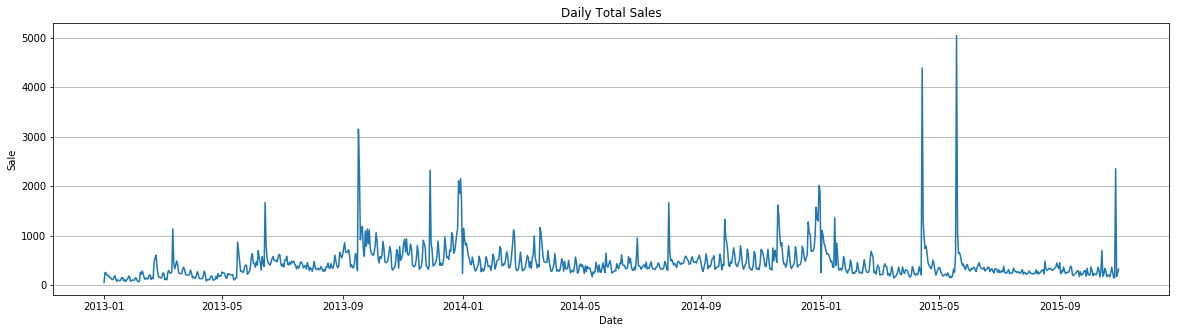

In [6]:
plt.subplots(figsize=(20, 5))
plt.plot(total_sale)
plt.ylabel('Sale')
plt.xlabel('Date')
plt.grid(True, axis='y')
plt.title('Daily Total Sales')
plt.show()

We can see that there is a slight annual trend of increased sales around Janurary of each year. However, there are many spikes of sales that do not follow any seasonality.

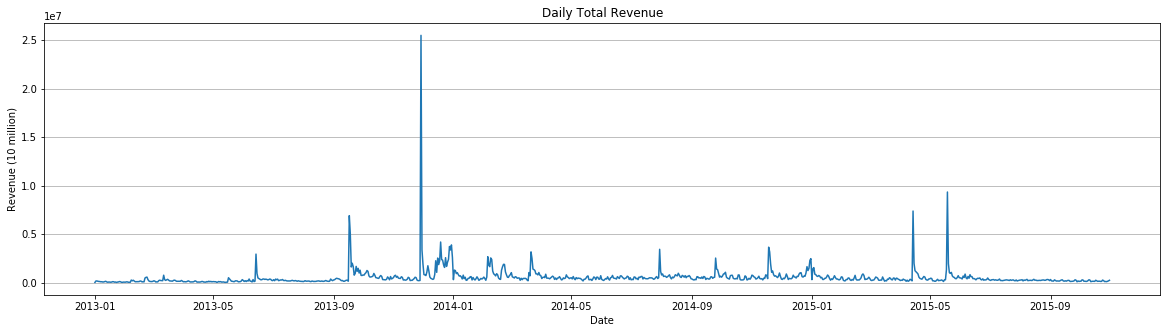

In [7]:
plt.subplots(figsize=(20, 5))
plt.plot(total_rev)
plt.ylabel('Revenue (10 million)')
plt.xlabel('Date')
plt.grid(True, axis='y')
plt.title('Daily Total Revenue')
plt.show()

By comparing sale quanity and revnue, we can see that most of the spikes in quantity sold also corresponding to spike in revenue. Interestingly, the day with the highest revenue only comes in fourth in quantity sold. 

## Categorical Analysis

In [8]:
# Load and merge item category IDs to sales data
df_items = pd.read_csv('items.csv')
df_items = df_items[['item_id','item_category_id']]

In [9]:
print('Number of different categories: %i' % len(df_items.item_category_id.unique()))

Number of different categories: 84


In [10]:
unique_item = pd.DataFrame(df.item_id.unique())
unique_item['item_id'] = unique_item[0]
unique_item = unique_item.drop(0, axis=1)
print(unique_item.head())
cat_item = pd.merge(unique_item, df_items, on='item_id')
print(cat_item.head())

   item_id
0     5823
1     1830
2     1905
3     2808
4    22088
   item_id  item_category_id
0     5823                35
1     1830                30
2     1905                30
3     2808                30
4    22088                83


In [11]:
print('Total number of categories in filtered data set: %i' %len(cat_item.item_category_id.unique()))

Total number of categories in filtered data set: 14


Compared to the total number of categories in the company's data, only 14 of them are included in the data set that we are focusing on.

In [ ]:
# Obtain counts of items in each category
cat_item_count = cat_item.groupby(cat_item['item_category_id'])['item_id'].count()

cat_item_count.index = cat_item_count.index.astype(str)

In [ ]:
plt.subplots(figsize=(20, 5))
plt.bar(cat_item_count.index, cat_item_count)
plt.ylabel('Number of items in category', fontsize=20)
plt.yticks(np.arange(0,23,2))
plt.xlabel('Category IDs', fontsize=20)
plt.title('Category Items Count', fontsize=20)
plt.grid(True, axis='y')

In [15]:
# Produce categorical and item sales dataframe
df_cat = pd.merge(df, df_items, on='item_id')
df_cat['Sales'] = df_cat['item_price'] * df_cat['item_cnt_day']
df_cat.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day    Sales  \
0               0       18     5823     2500.00           1.0  2500.00   
1               0       42     5823     2490.00           1.0  2490.00   
2               0       56     5823     2500.00           1.0  2500.00   
3               0       31     5823     2495.28           1.0  2495.28   
4               0       56     5823     2500.00           1.0  2500.00   

   item_category_id  
0                35  
1                35  
2                35  
3                35  
4                35

In [17]:
# Obtain sales of each category
cat_item_sales = df_cat.groupby(df_cat['item_category_id'])['item_cnt_day'].count()

cat_item_sales.index = cat_item_sales.index.astype(str)

In [16]:
# Obtain Revenue of each category
cat_rev = df_cat.groupby(df_cat['item_category_id'])['Sales'].sum()

cat_rev.index = cat_rev.index.astype(str)

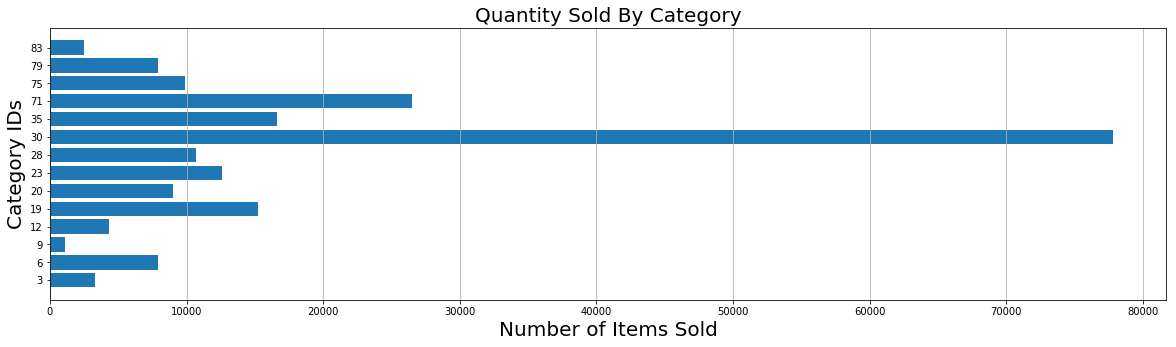

In [18]:
plt.subplots(figsize=(20, 5))
plt.barh(cat_item_sales.index, cat_item_sales)
plt.xlabel('Number of Items Sold', fontsize=20)
plt.yticks(cat_item_sales.index)
plt.ylabel('Category IDs', fontsize=20)
plt.title('Quantity Sold By Category', fontsize=20)
plt.grid(True, axis='x')

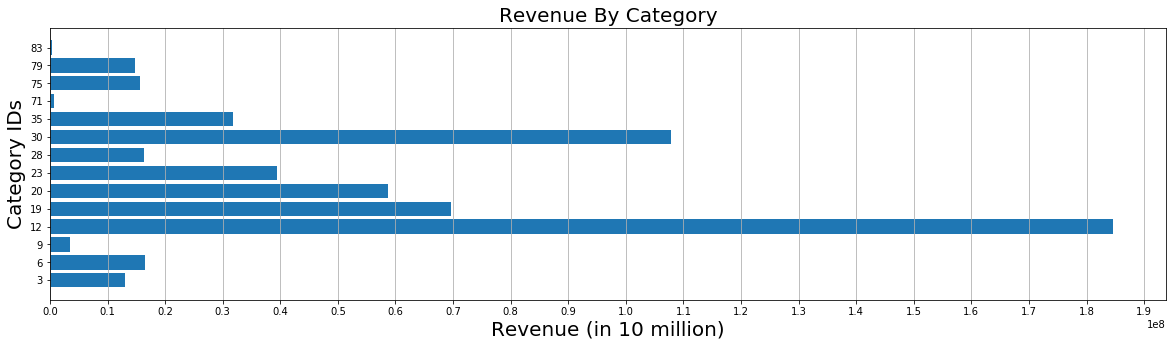

In [19]:
plt.subplots(figsize=(20, 5))
plt.barh(cat_rev.index, cat_sold)
plt.xlabel('Revenue (in 10 million)', fontsize=20)
plt.yticks(cat_rev.index)
plt.xticks(np.arange(0, 2*10**8, 10**7))
plt.ylabel('Category IDs', fontsize=20)
plt.title('Revenue By Category', fontsize=20)
plt.grid(True, axis='x')

Although category ID 30 has nearly half of the entire item IDs and has highest number of units sold, it ranks only second in terms of revenue. There is only one item ID in category 12, but it has the highest revenue due to its high price point.

## Shop Analysis

In [20]:
print('Number of shops in data set: %i' % len(df.shop_id.unique()))

Number of shops in data set: 40


In [21]:
shop_rev = df_cat.groupby(['shop_id'])['Sales'].sum().sort_index()
shop_rev = pd.DataFrame(shop_rev)
print(shop_rev.head())

                Sales
shop_id              
2        1.090120e+07
3        7.111580e+06
4        9.841700e+06
5        8.362179e+06
6        2.155128e+07


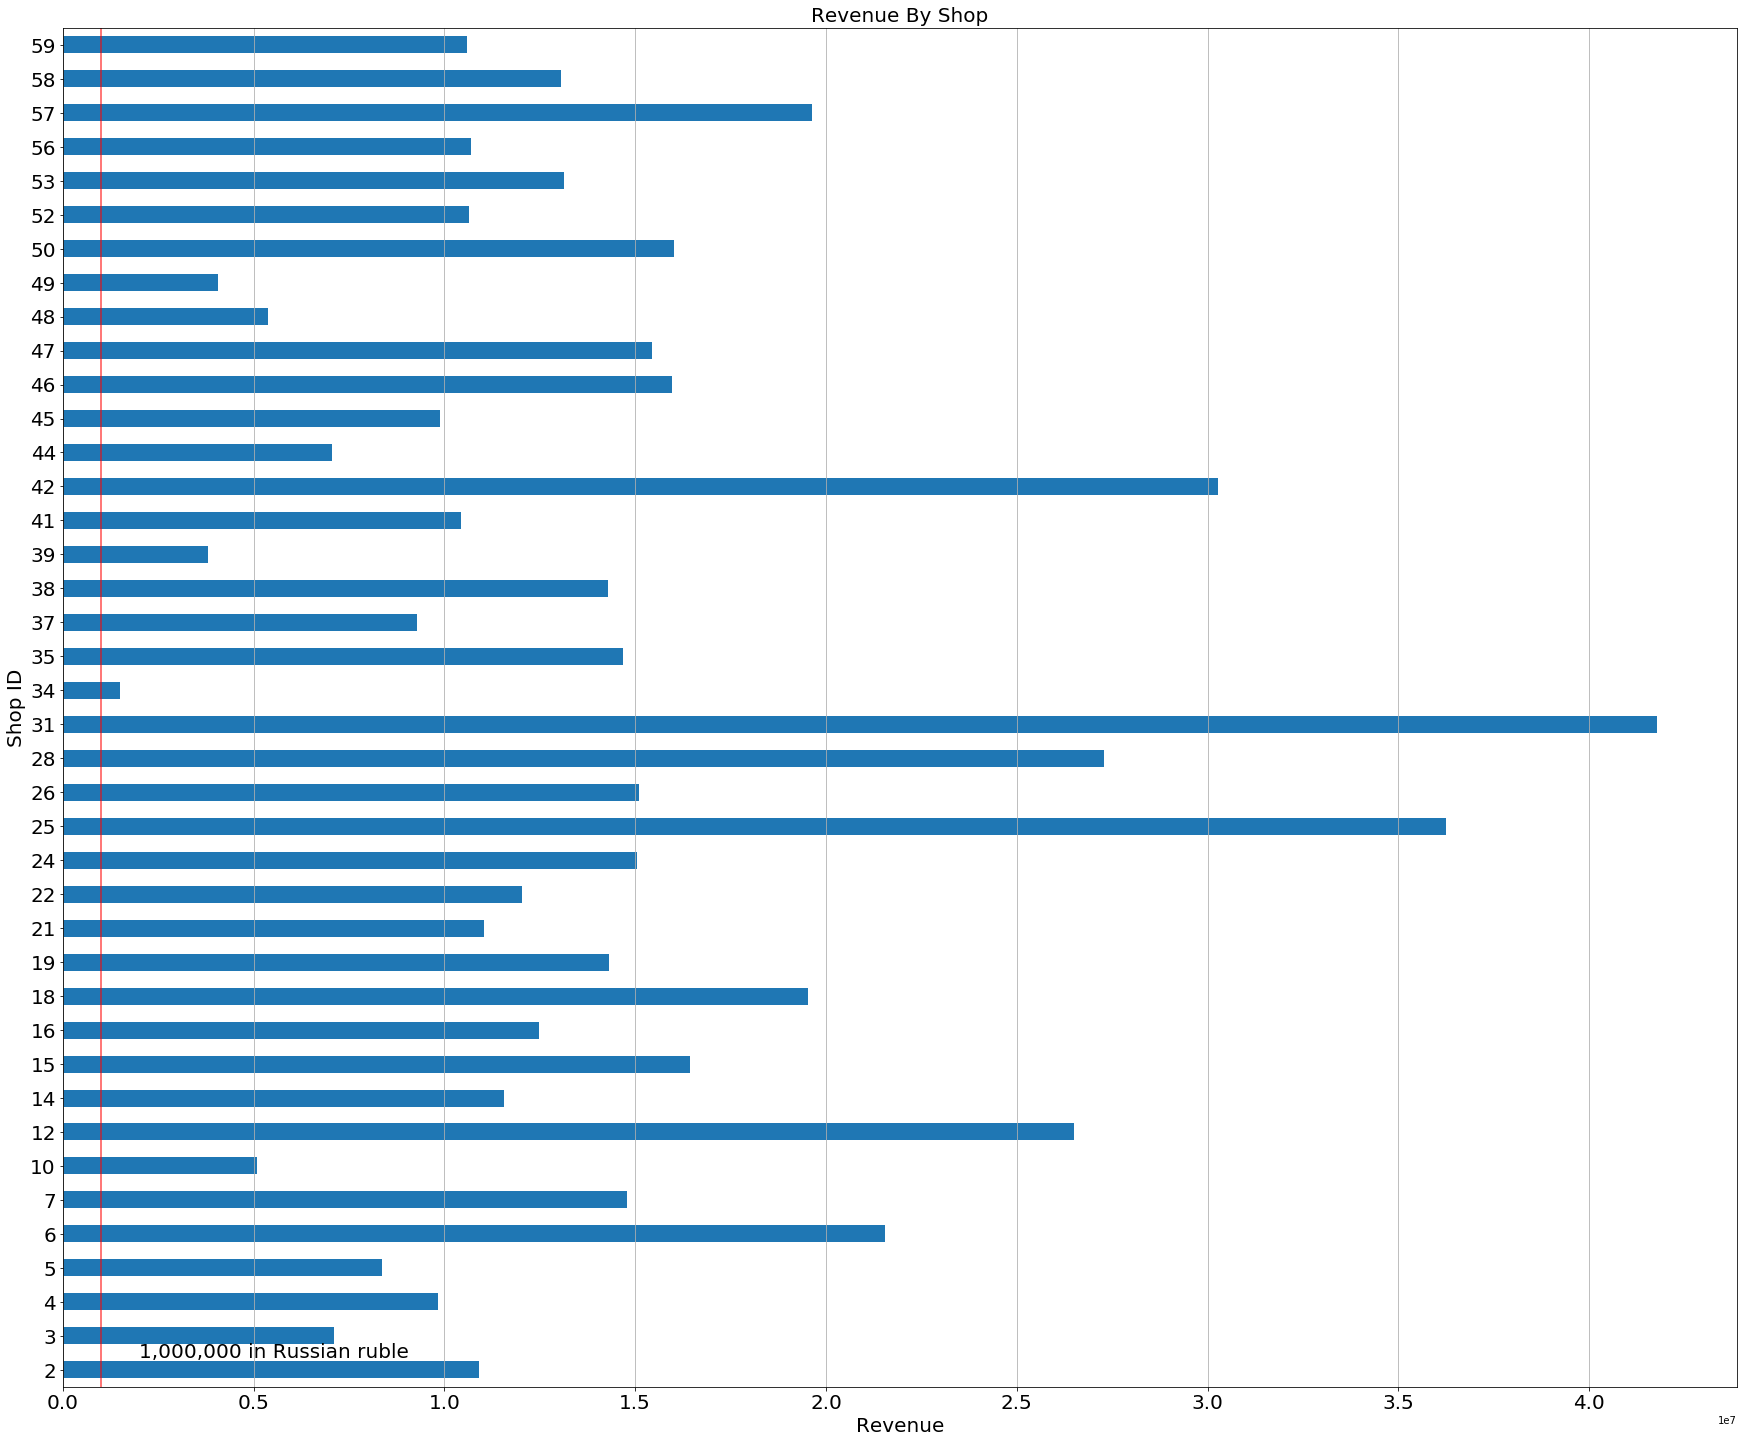

In [22]:
shop_rev.plot.barh(figsize=[30,25], fontsize=20, legend=False)
plt.ylabel('Shop ID', fontsize=20)
plt.xlabel('Revenue', fontsize=20)
plt.title('Revenue By Shop', fontsize=20)
plt.grid(True, axis='x')
plt.axvline(x=1000000, color='r', alpha=.7, label='1000000')
plt.text(2000000,0.35,'1,000,000 in Russian ruble', fontsize=20)
plt.show()

In [23]:
%%time
# Create a grid for visualizing the time span of each items in stores

shop_timeframe = pd.DataFrame(index = pd.date_range(start='2013-01-01', end='2015-10-31'))
numb_frame = 1
for i in sort(df.shop_id.unique()):
    shop_time = df.loc[df['shop_id'] == i].sort_index()
    shop_timeframe[i] = shop_timeframe.index.to_series().apply(lambda x: numb_frame if x >= shop_time.index.min() and x <= shop_time.index.max() else numpy.NaN)
    numb_frame = numb_frame + 1

print(shop_timeframe.sort_index().head())

            2    3    4   5    6   7    10  12  14  15  ...     47  48  49  \
2013-01-01   1  NaN  NaN NaN  NaN   6  NaN NaN   9  10  ...    NaN NaN NaN   
2013-01-02   1  2.0  3.0 NaN  5.0   6  NaN NaN   9  10  ...   31.0 NaN NaN   
2013-01-03   1  2.0  3.0 NaN  5.0   6  NaN NaN   9  10  ...   31.0 NaN NaN   
2013-01-04   1  2.0  3.0 NaN  5.0   6  7.0 NaN   9  10  ...   31.0 NaN NaN   
2013-01-05   1  2.0  3.0 NaN  5.0   6  7.0 NaN   9  10  ...   31.0 NaN NaN   

              50    52    53    56  57  58    59  
2013-01-01   NaN   NaN   NaN   NaN NaN NaN   NaN  
2013-01-02  34.0  35.0  36.0  37.0 NaN NaN  40.0  
2013-01-03  34.0  35.0  36.0  37.0 NaN NaN  40.0  
2013-01-04  34.0  35.0  36.0  37.0 NaN NaN  40.0  
2013-01-05  34.0  35.0  36.0  37.0 NaN NaN  40.0  

[5 rows x 40 columns]
CPU times: user 717 ms, sys: 10.1 ms, total: 727 ms
Wall time: 736 ms


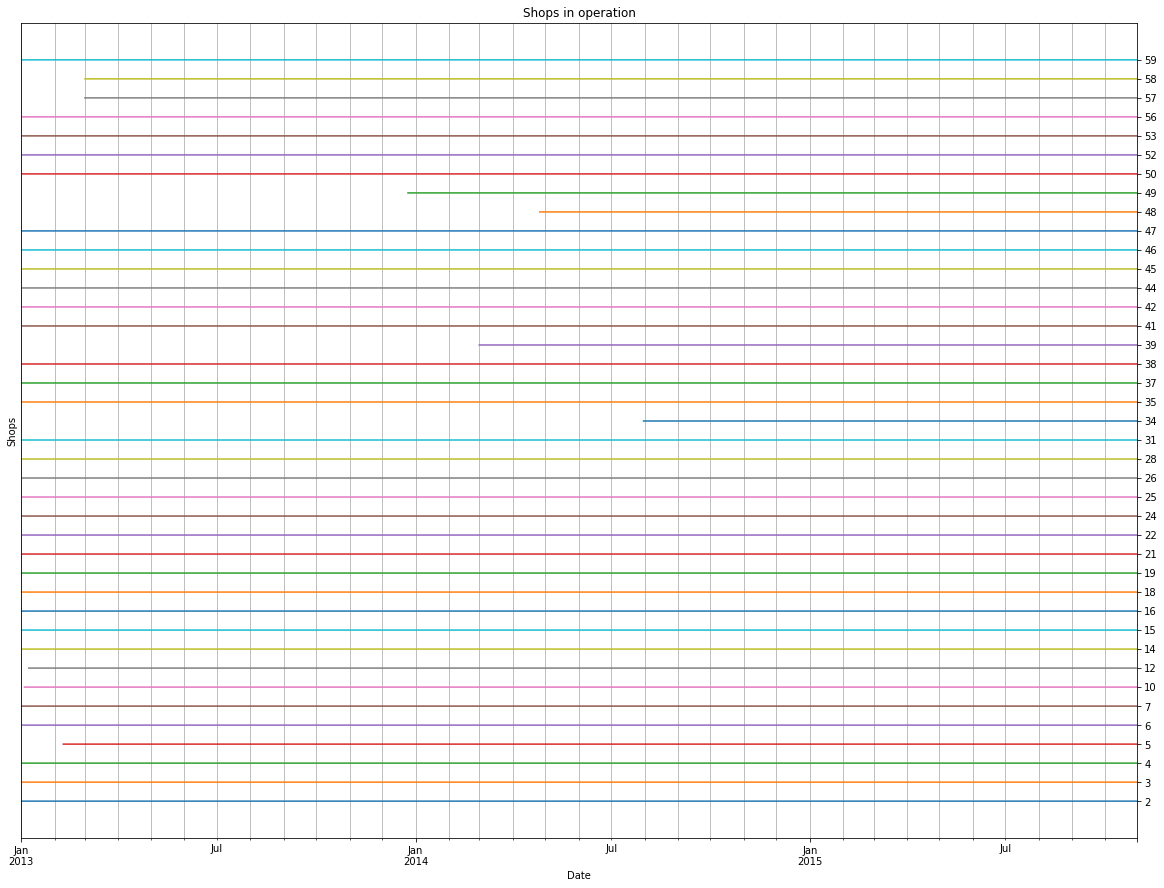

In [24]:
df_transpose = shop_timeframe.transpose()

p = shop_timeframe.plot(figsize = (20,15), legend=False)
p.yaxis.tick_right()
p.set_yticks(np.arange(1,len(df_transpose.index)+1,1))
p.set_yticklabels(df_transpose.index)
p.set_xlabel('Date')
p.set_ylabel('Shops')
p.set_xlim('2013-01-01', '2015-10-31')
p.grid(axis = 'x', which='both')
p.set_title('Shops in operation')
plt.show()

The graph above shows that all stores that are included in the data for forecasting have been in operation for at least 12 months. Majority of them have been in operator for more than 24 months. Shop ID 34 has the shortest operating period and also have the lowest revenue among the stores.

## Item Analysis

In [25]:
# Obtain sales of each category
item_count = df_cat.groupby(df_cat['item_id'])['item_cnt_day'].sum()

item_count.index = item_count.index.astype(str)

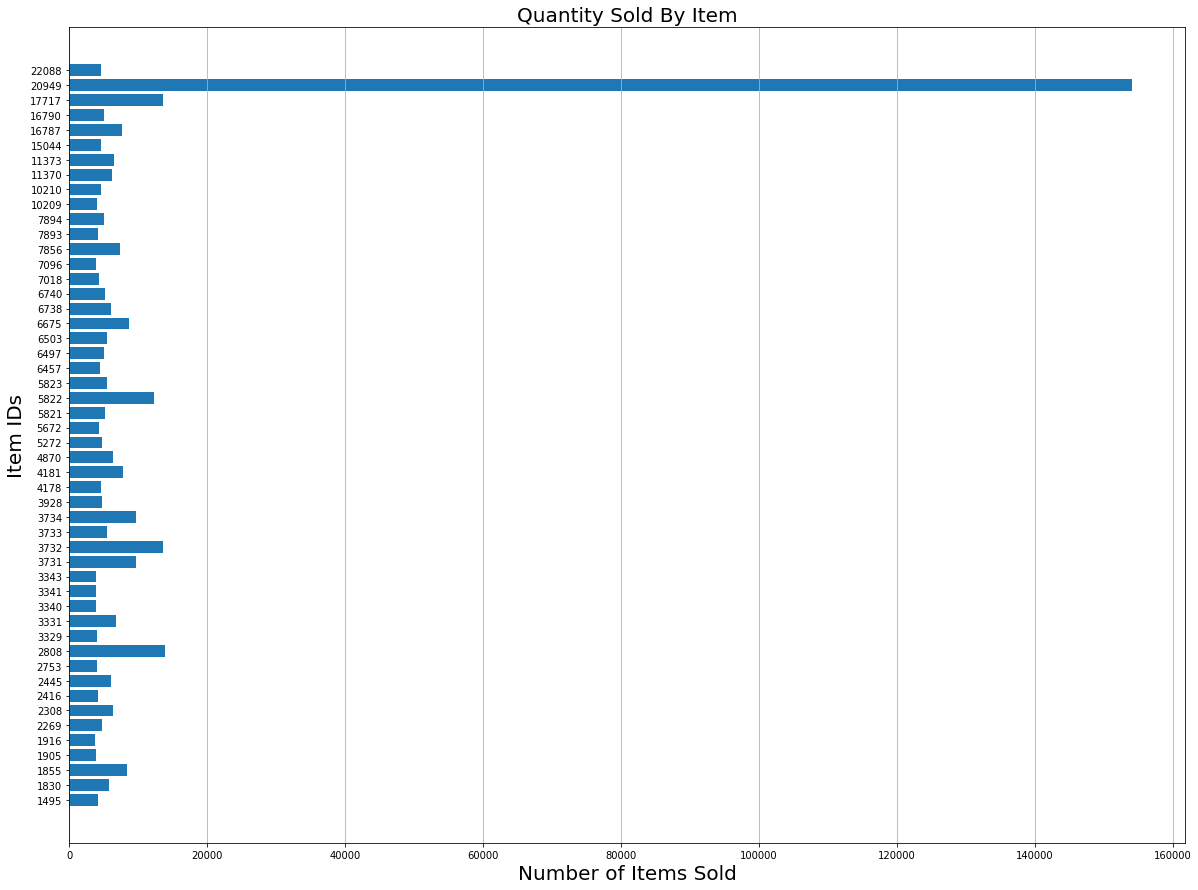

In [26]:
plt.subplots(figsize=(20, 15))
plt.barh(item_count.index, item_count)
plt.xlabel('Number of Items Sold', fontsize=20)
plt.yticks(item_count.index)
plt.ylabel('Item IDs', fontsize=20)
plt.title('Quantity Sold By Item', fontsize=20)
plt.grid(True, axis='x')

In [27]:
# Obtain sales of each category
item_rev = df_cat.groupby(df_cat['item_id'])['Sales'].sum()

item_rev.index = item_rev.index.astype(str)

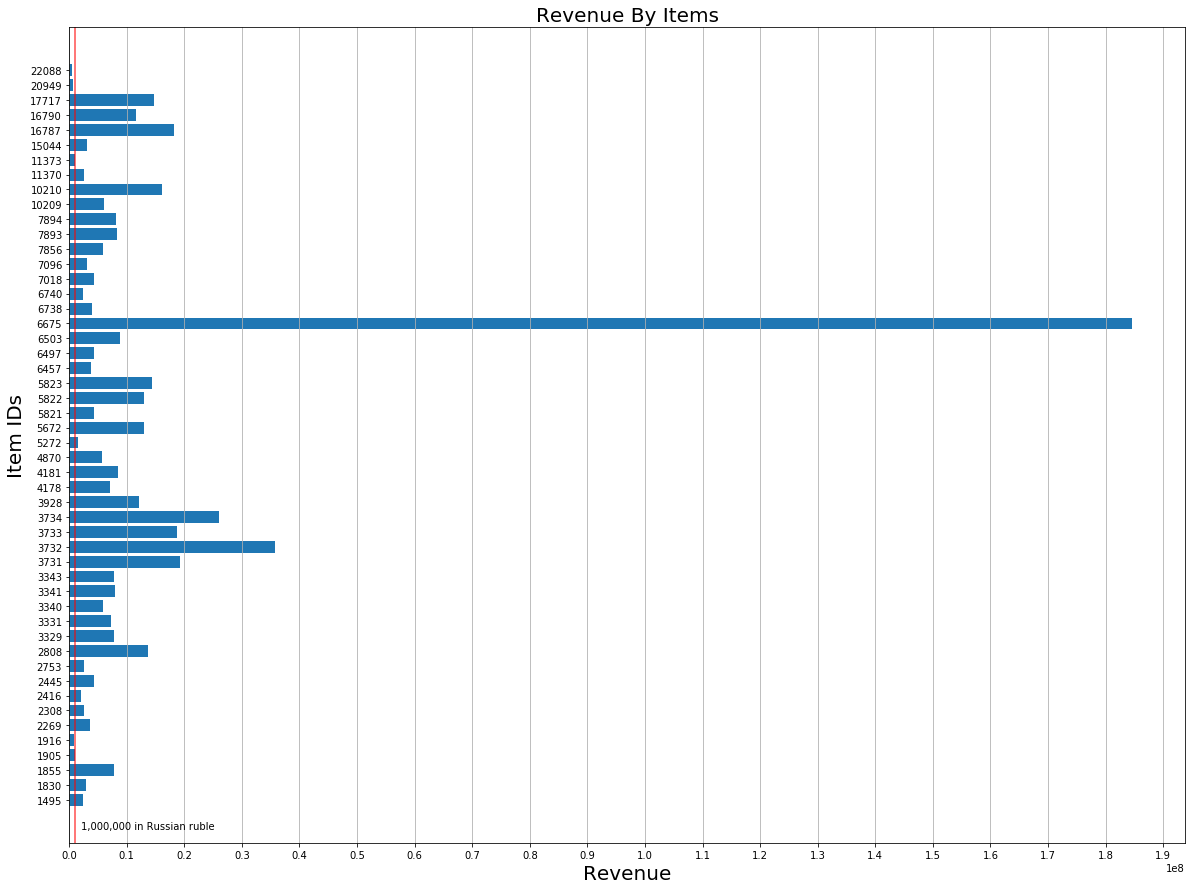

In [28]:
plt.subplots(figsize=(20, 15))
plt.barh(item_rev.index, item_rev)
plt.xlabel('Revenue', fontsize=20)
plt.xticks(np.arange(0, 2*10**8, 10**7))
plt.ylabel('Item IDs', fontsize=20)
plt.yticks(item_count.index)
plt.title('Revenue By Items', fontsize=20)
plt.axvline(x=1000000, color='r', alpha=.7, label='1000000')
plt.text(x=2000000, y=-2,s='1,000,000 in Russian ruble', fontsize=10)
plt.grid(True, axis='x')

Item ID 20949 is one of the lowest grossing item despite the number of items sold dwarfed other items. On the contrary, item ID 6675 has quantity sold slightly higher than the average, but it has more than 4 times higher revenue than the item with the second highest revenue.

In [29]:
# Create a grid for visualizing the time span of each items in stores

item_timeframe = pd.DataFrame(index = pd.date_range(start='2013-01-01', end='2015-10-31'))
numb_frame = 1
for i in sort(df.item_id.unique()):
    item_time = df.loc[df['item_id'] == i].sort_index()
    item_timeframe[i] = item_timeframe.index.to_series().apply(lambda x: numb_frame if x >= item_time.index.min() and x <= item_time.index.max() else numpy.NaN)
    numb_frame = numb_frame + 1
    
item_timeframe.sort_index().head()

1495   1830   1855   1905   1916   2269   2308   2416   2445   \
2013-01-01    NaN    2.0    NaN      4    5.0    NaN      7    8.0    NaN   
2013-01-02    NaN    2.0    NaN      4    5.0    NaN      7    8.0    NaN   
2013-01-03    NaN    2.0    NaN      4    5.0    NaN      7    8.0    NaN   
2013-01-04    NaN    2.0    NaN      4    5.0    NaN      7    8.0    NaN   
2013-01-05    NaN    2.0    NaN      4    5.0    NaN      7    8.0    NaN   

            2753   ...    10209  10210  11370  11373  15044  16787  16790  \
2013-01-01    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-01-02    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-01-03    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-01-04    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-01-05    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            17717  20949  22088  
2013-01-01     48    NaN     50  
2013-01-02     48    NaN     50  
2013-01-03     48    NaN     50  
2013-01-04     48    NaN     50  
2013-01-05     48    NaN     50  

[5 rows x 50 columns]

In [30]:
df_transpose = item_timeframe.transpose()

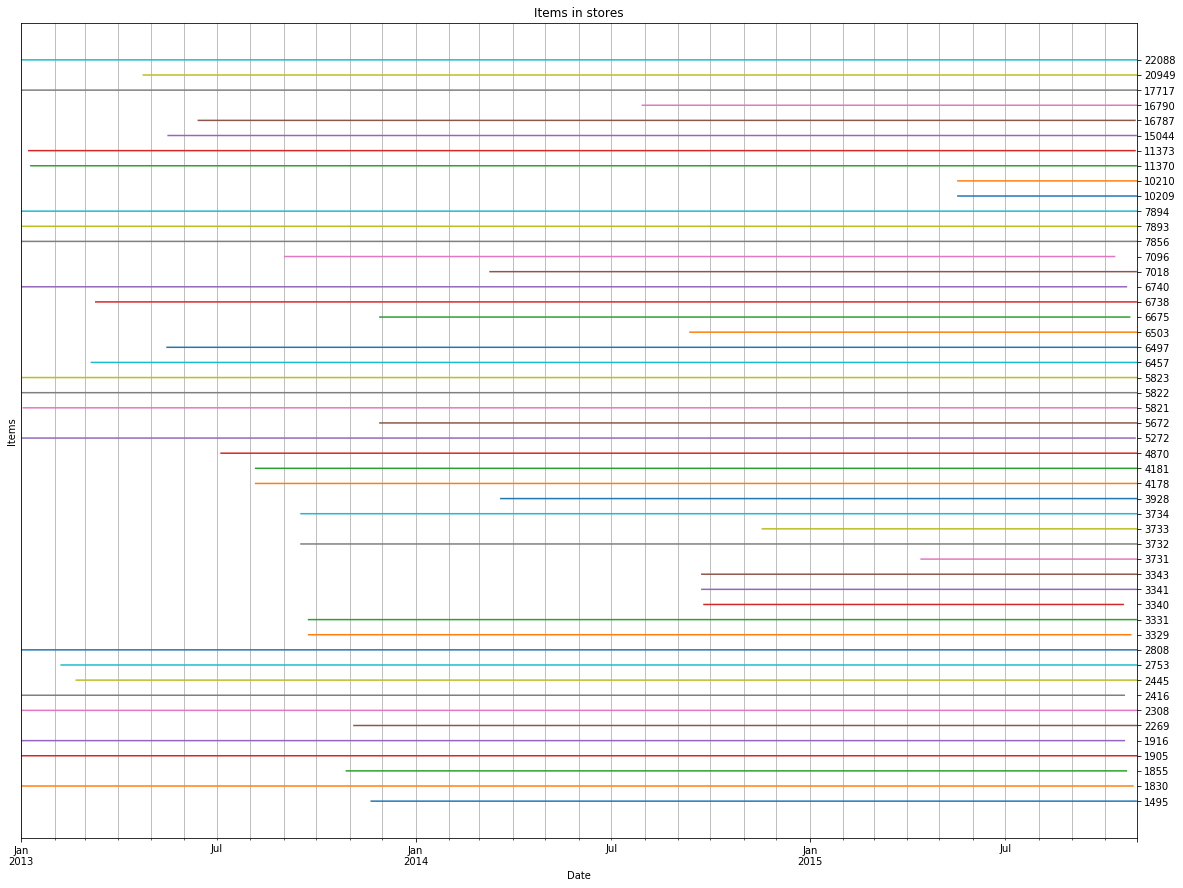

In [31]:
p = item_timeframe.plot(figsize = (20,15), legend=False)
p.yaxis.tick_right()
p.set_yticks(np.arange(1,51,1))
p.set_yticklabels(df_transpose.index)
p.set_xlabel('Date')
p.set_ylabel('Items')
p.set_xlim('2013-01-01', '2015-10-31')
p.grid(axis = 'x', which='both')
p.set_title('Items in stores')
plt.show()

The graph above shows that there are large variations of amount of time each items have been available in stores. Less than two dozens of items have been in stores for the entire duration of the data. There are 4 item IDs that have been in stores for 12 months or less.

## Pricing Analysis

The sale record includes the price of an item when it is sold. With the price data, we can find possible decrease in pricing that indicates discount or promotion and whether it has correlation to sale increase.

In [67]:
df_name = pd.read_csv('items.csv')
df_name.head(2)

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   

   item_category_id  
0                40  
1                76

In [111]:
# Create dataframe dictionary with category information and aggregation of daily item price means and sale total

DataFrameDict = {elem : pd.DataFrame for elem in df.item_id.unique()}

df_product = pd.merge(df.reset_index(), df_name[['item_id','item_category_id']], on='item_id')

for key in DataFrameDict.keys():
    DataFrameDict[key] = df.loc[df.item_id == key]
    DataFrameDict[key] = DataFrameDict[key].reset_index()
    DataFrameDict[key].index = DataFrameDict[key]['date']
    DataFrameDict[key] = DataFrameDict[key].drop('date', axis=1)
    aggregation = {
    'item_price':'mean',
    'item_cnt_day':'sum'}
    DataFrameDict[key] = DataFrameDict[key].groupby('date').agg(aggregation)
    DataFrameDict[key]['item_id'] = key
    DataFrameDict[key] = DataFrameDict[key].reset_index().merge(df_name[['item_id','item_category_id']], how='left').set_index('date')

In [112]:
DataFrameDict[22088].head(2)

item_price  item_cnt_day  item_id  item_category_id
date                                                           
2013-01-01   79.000000           8.0    22088                83
2013-01-02   77.683333          34.0    22088                83

In [113]:
def Price_graph(item_key):
    fontsize = 20
    for key in item_key:
        fig, ax1 = plt.subplots(figsize=(20,5))

        ax1.plot(DataFrameDict[key].index, DataFrameDict[key]['item_cnt_day'], color='b', alpha=0.9)
        ax1.set_xlabel('Date', fontsize=fontsize)
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('Number Sold', color='b', fontsize=fontsize)
        ax1.tick_params(colors='b', size=10, labelsize=fontsize)
        plt.grid(True, axis='x')

        ax2 = ax1.twinx()
        ax2.plot(DataFrameDict[key].index, DataFrameDict[key]['item_price'], color='r', alpha=0.5)
        ax2.set_ylabel('Unit Price', color='r', fontsize=fontsize)
        ax2.tick_params(colors='r', size=10, labelsize=fontsize)

        cat_id = DataFrameDict[key].item_category_id[0]
        plt.title('Item ID %s, Category ID %s' % (key, cat_id), fontsize=25)
        fig.tight_layout()
        plt.show()

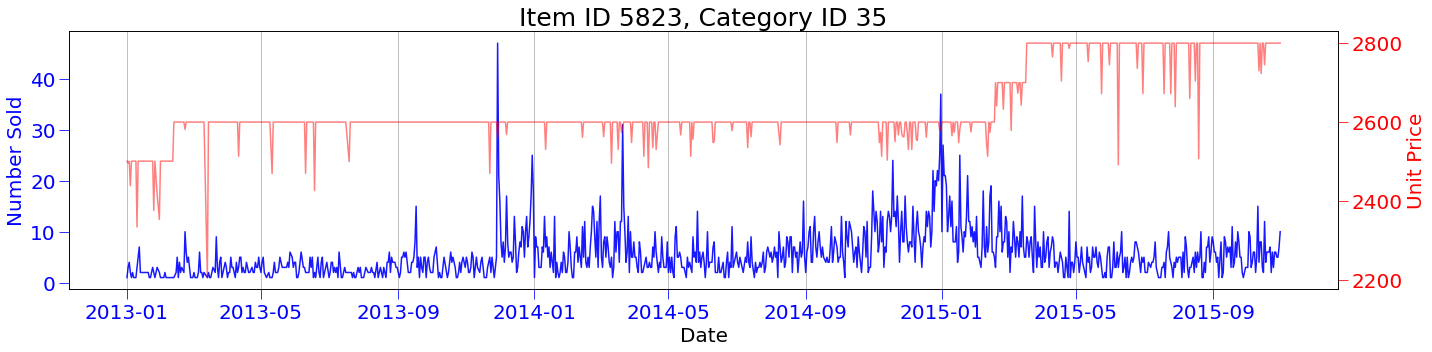

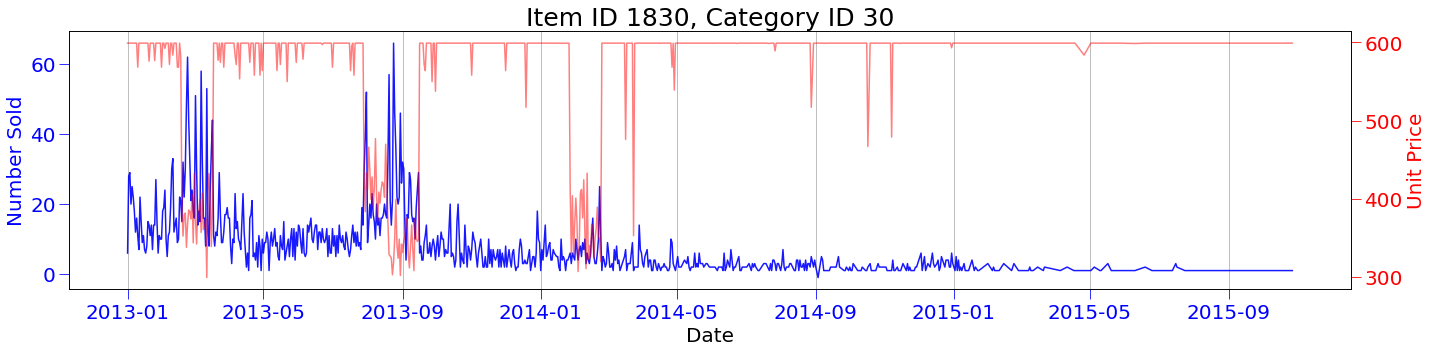

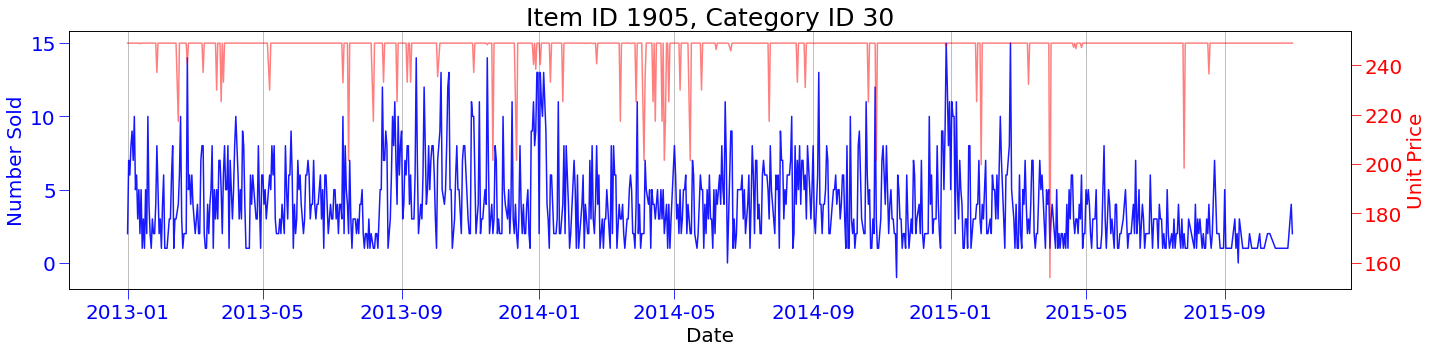

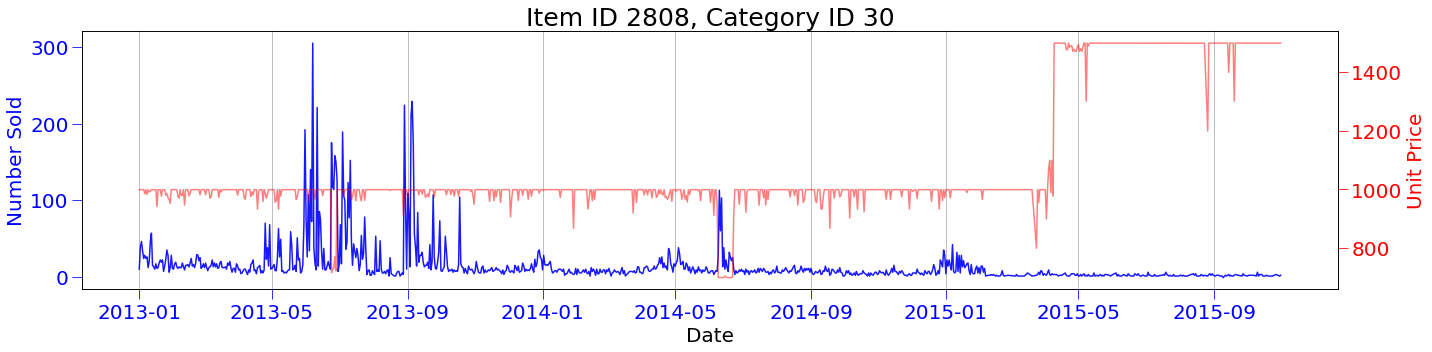

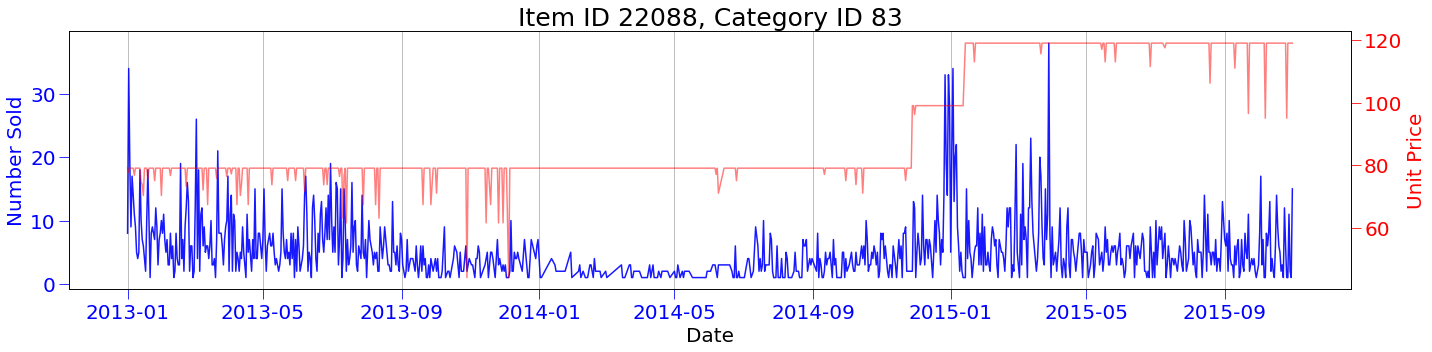

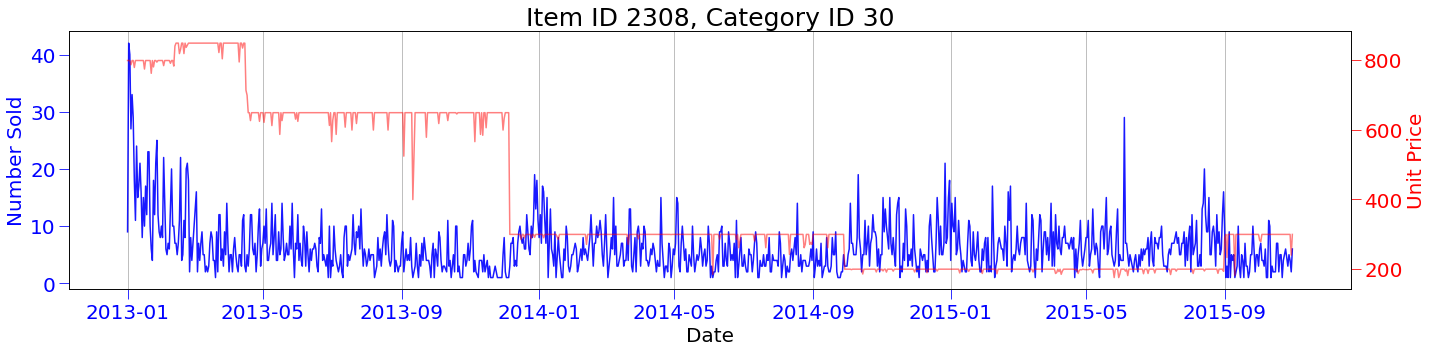

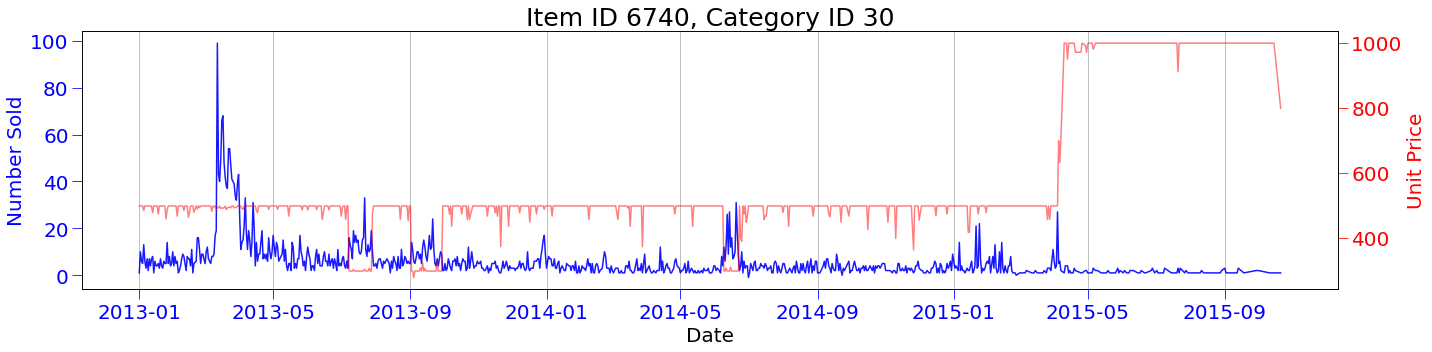

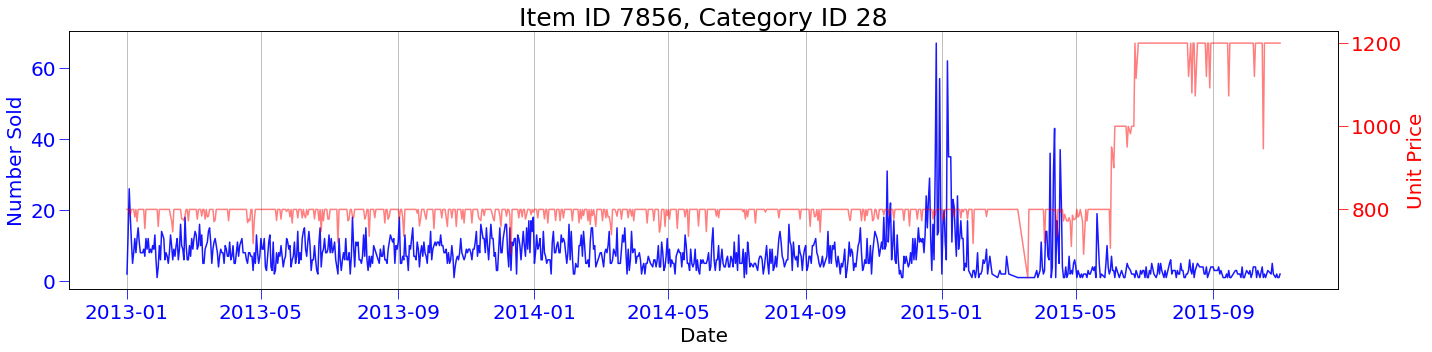

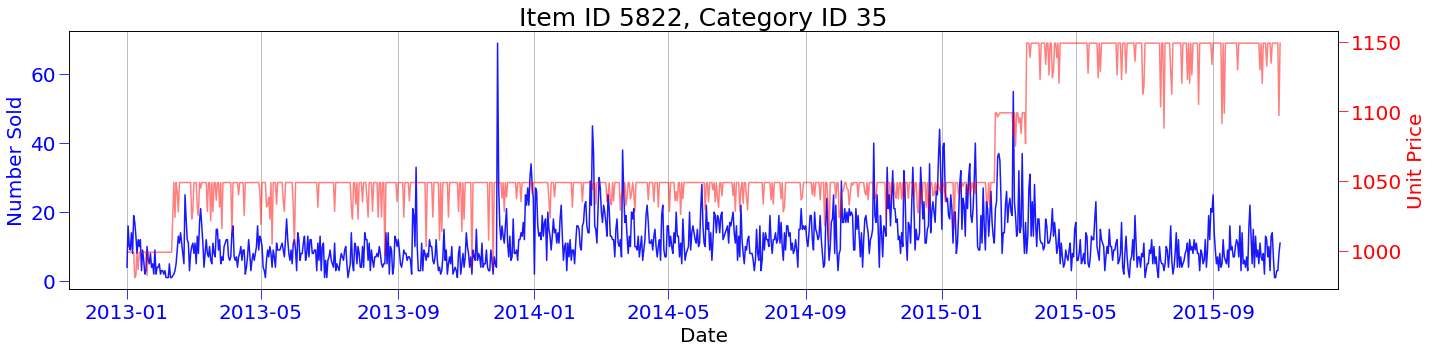

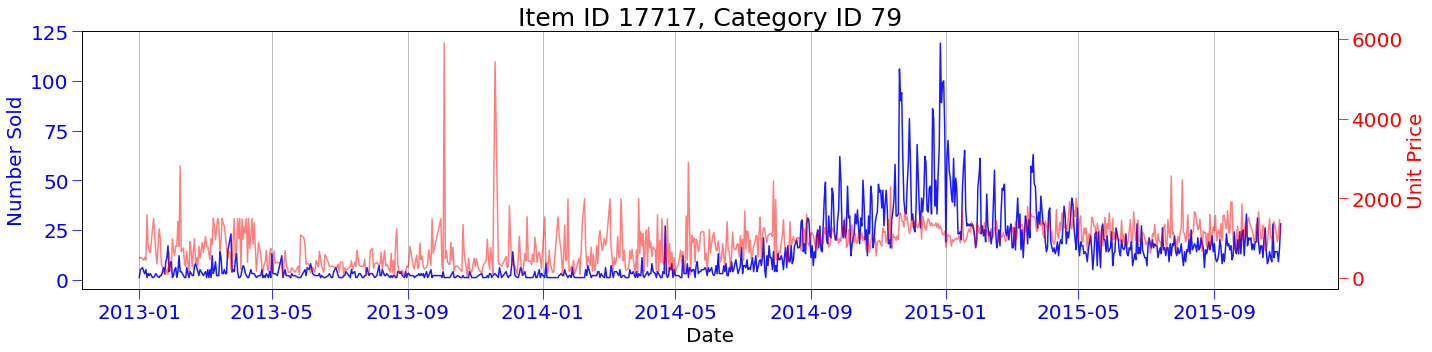

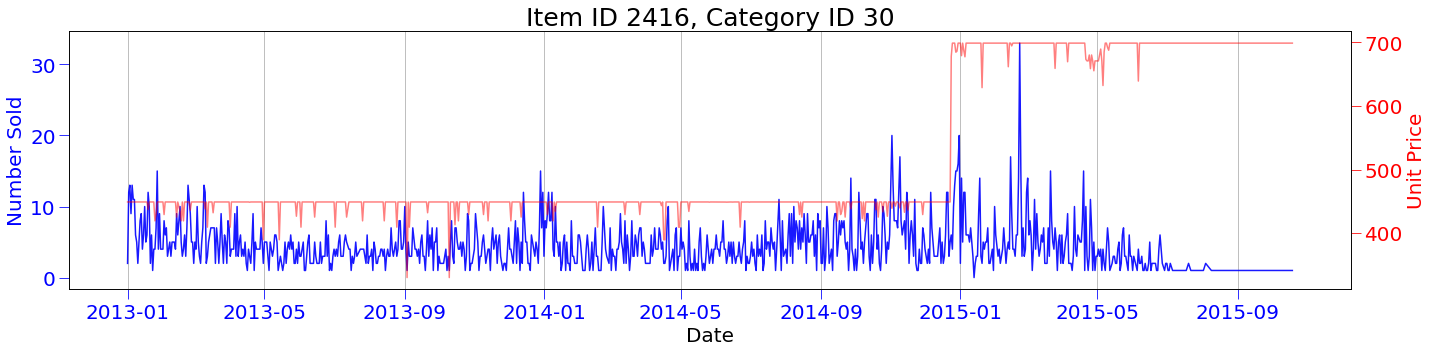

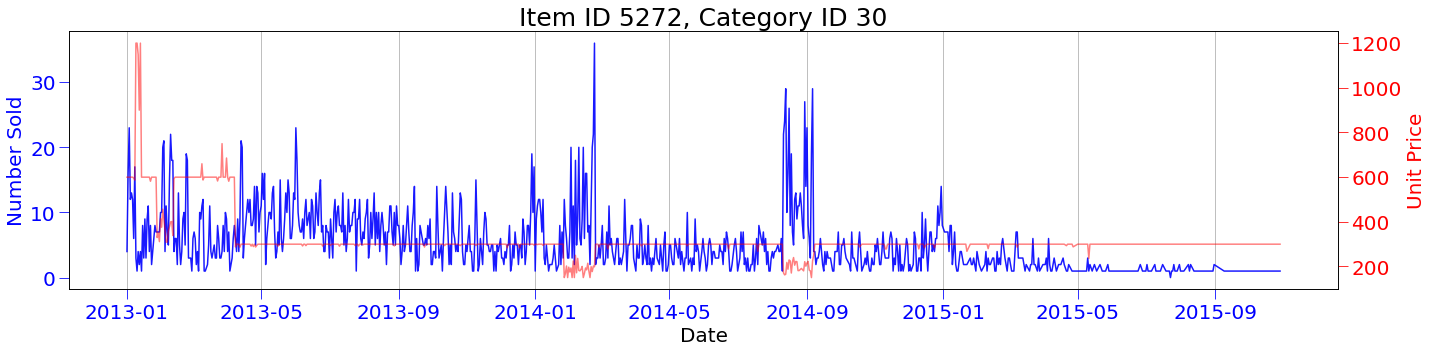

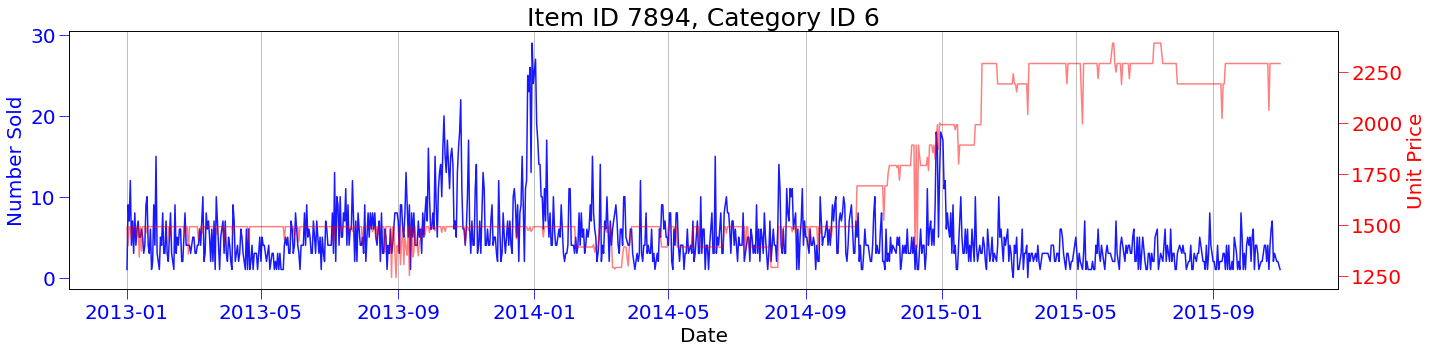

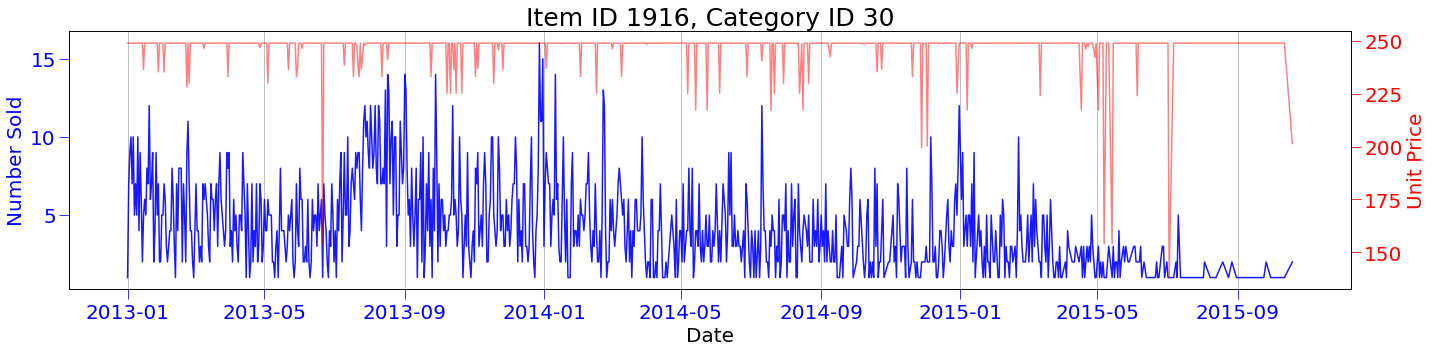

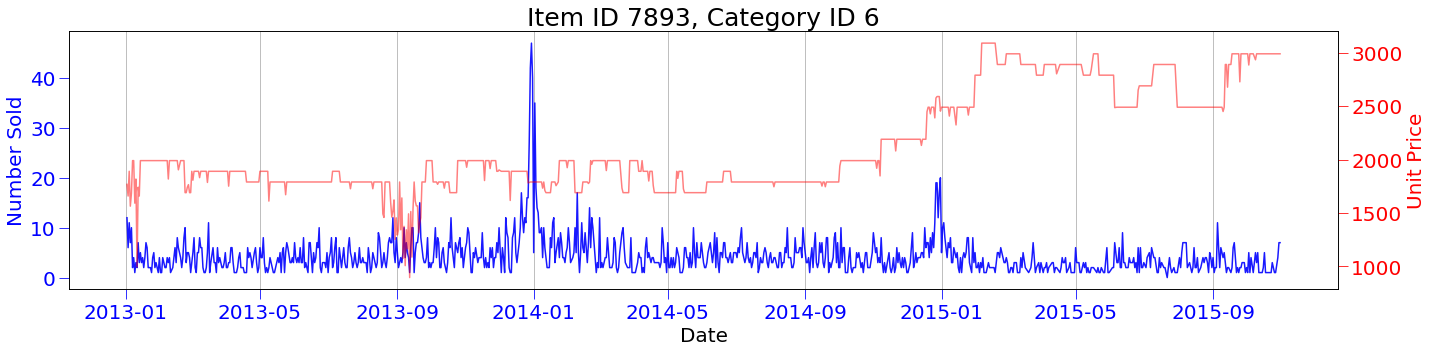

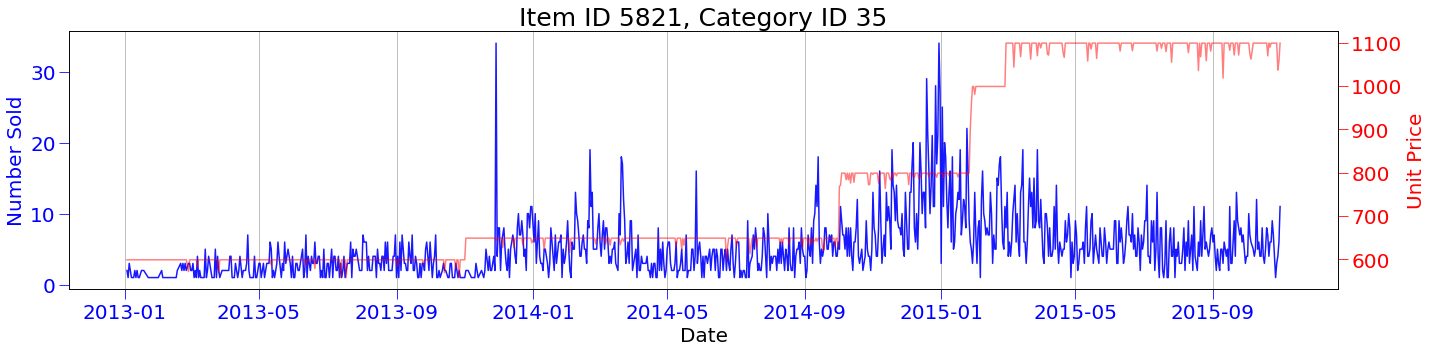

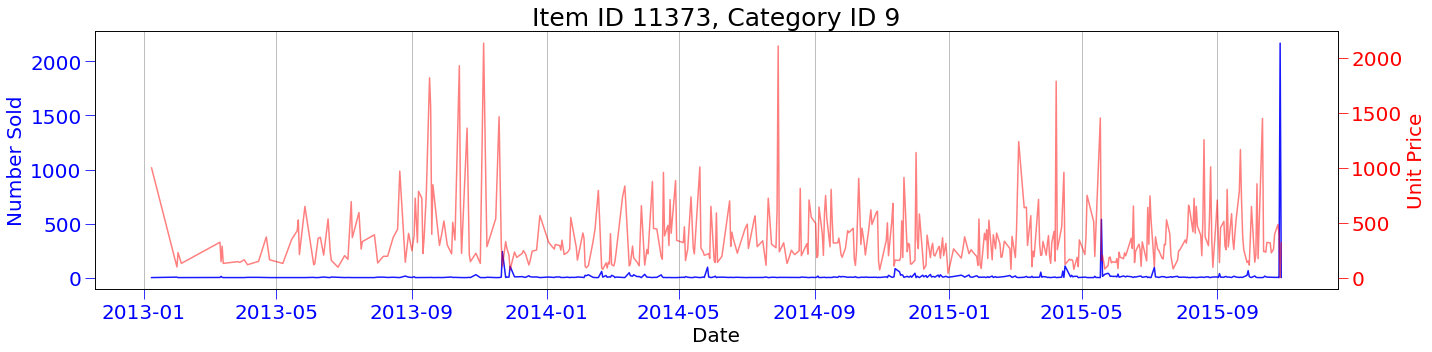

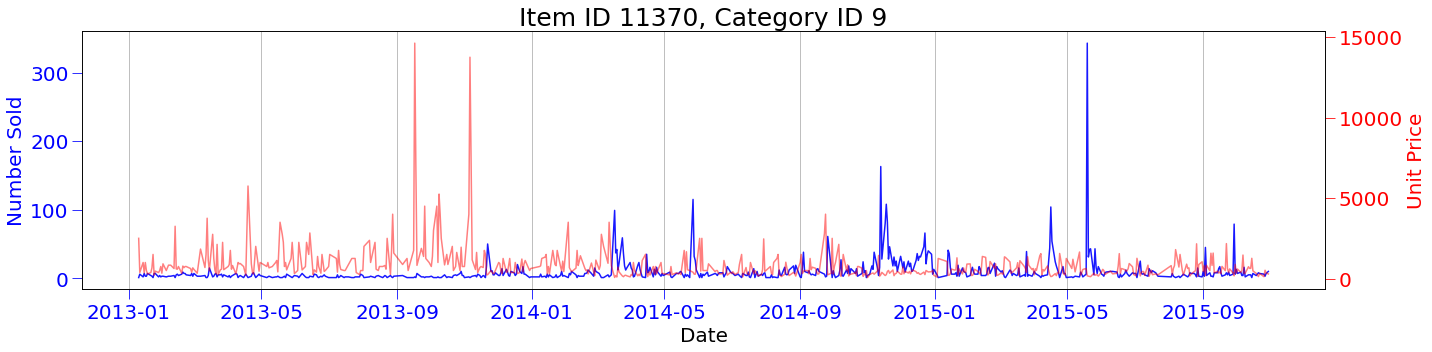

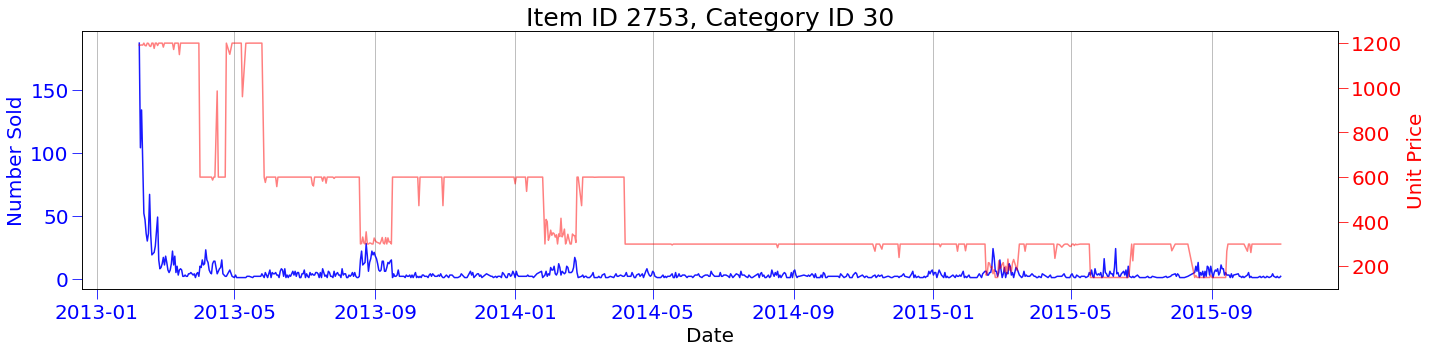

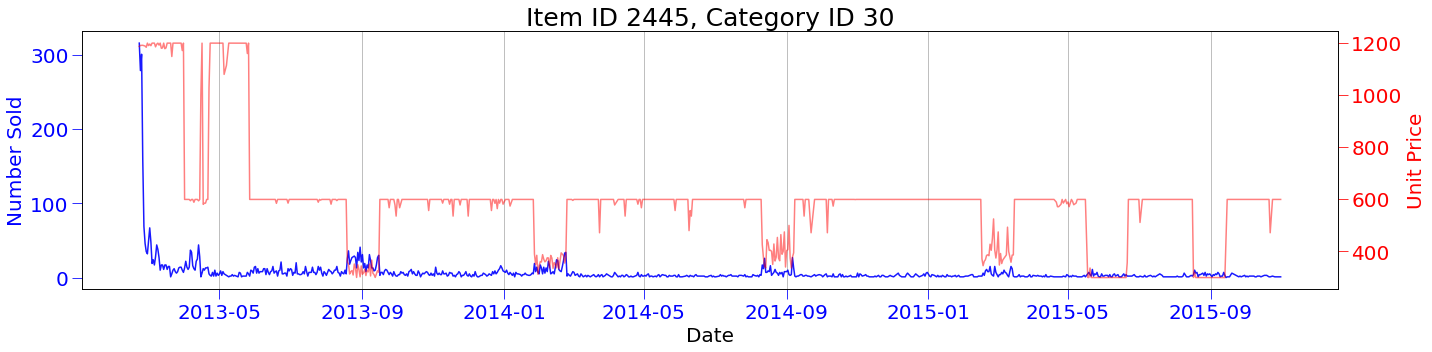

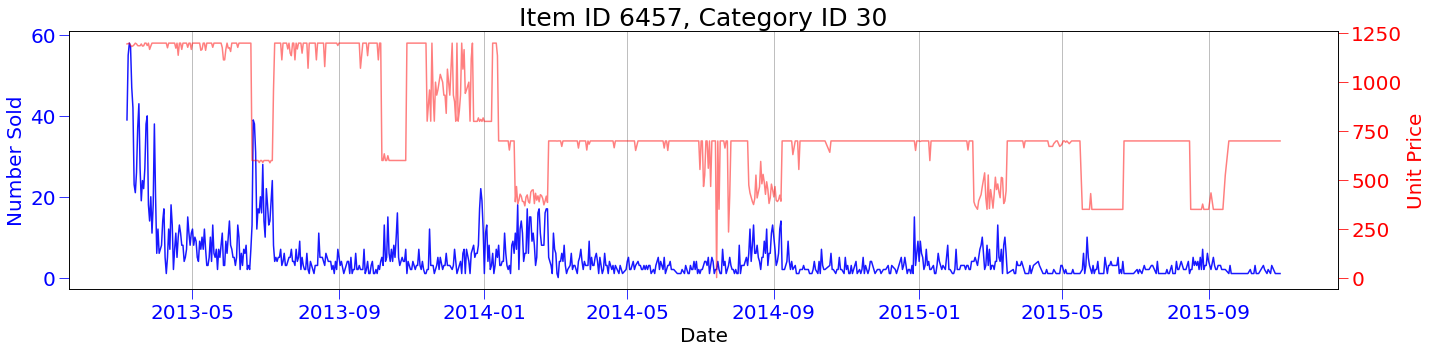

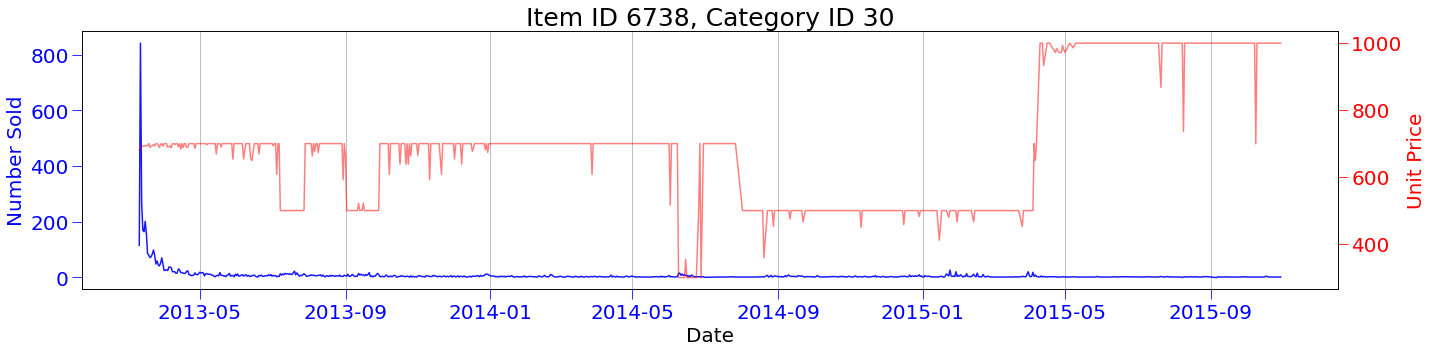

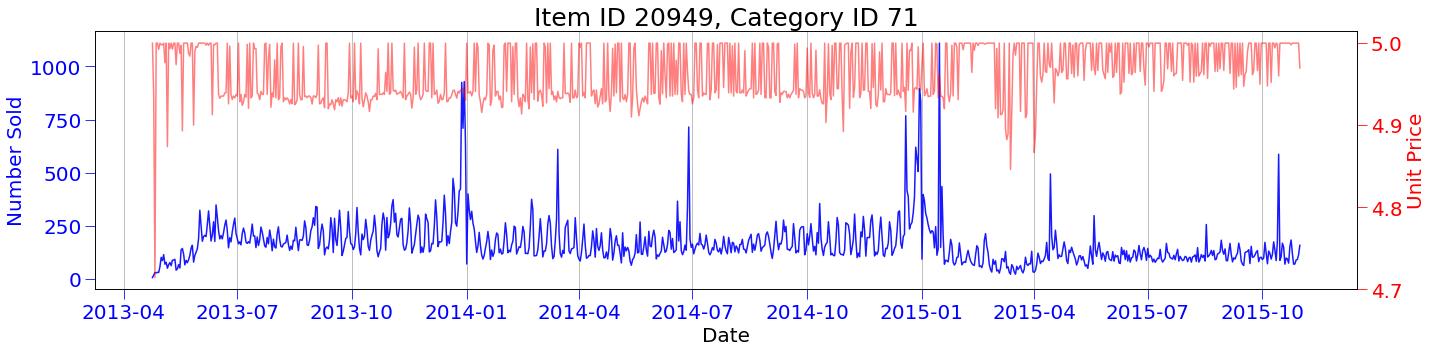

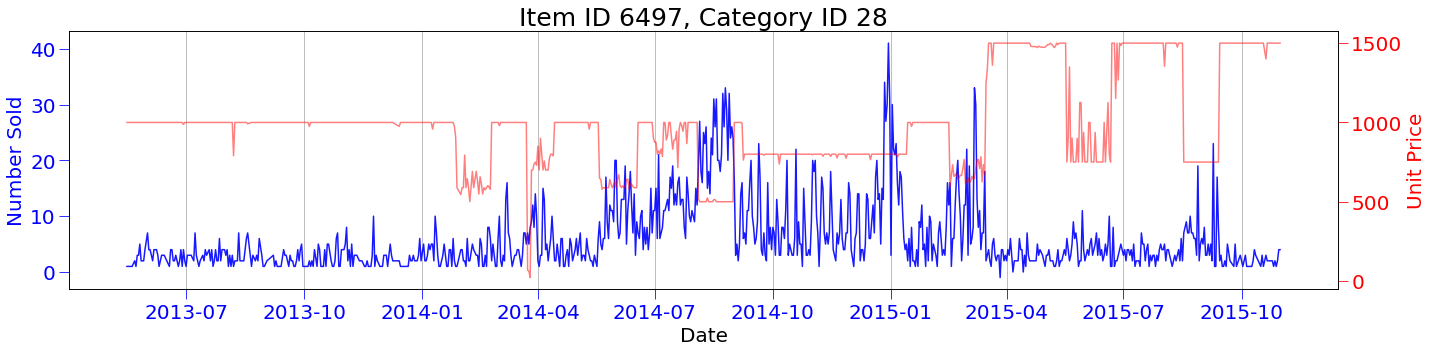

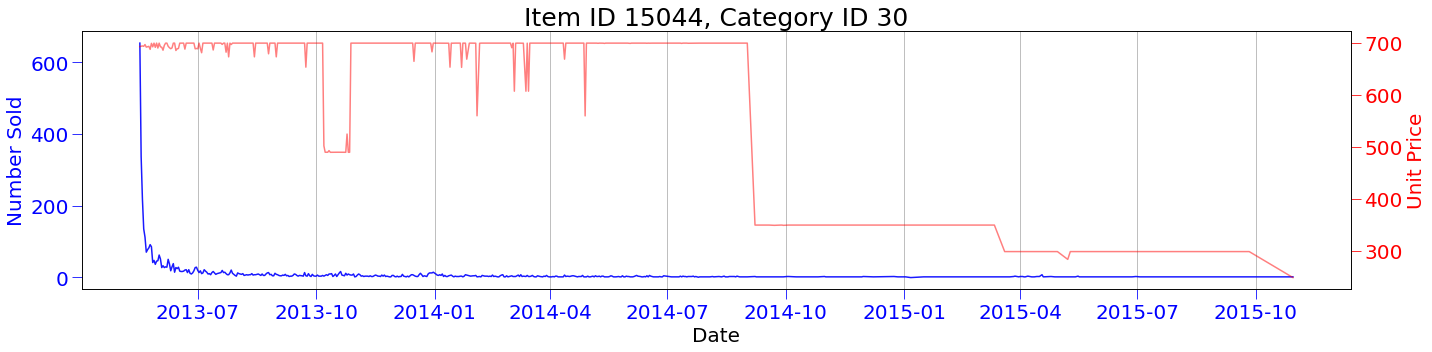

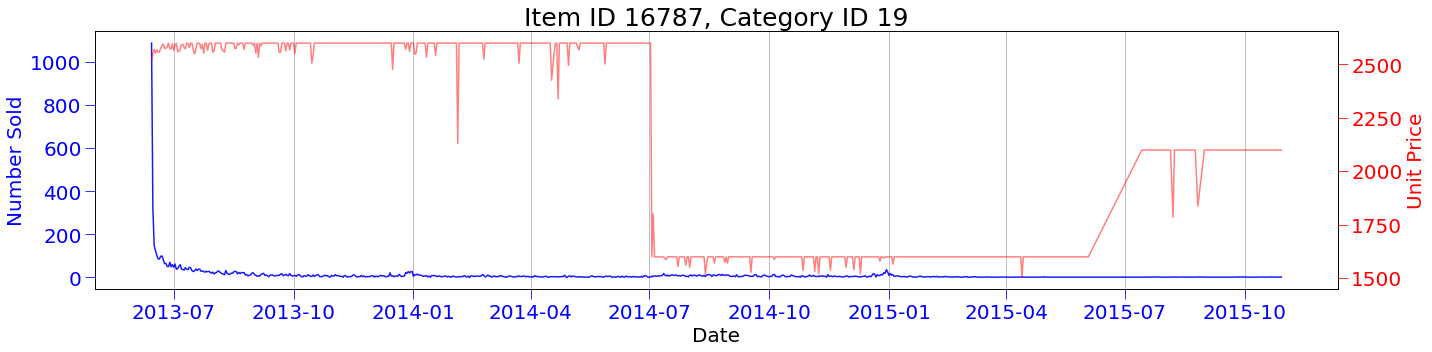

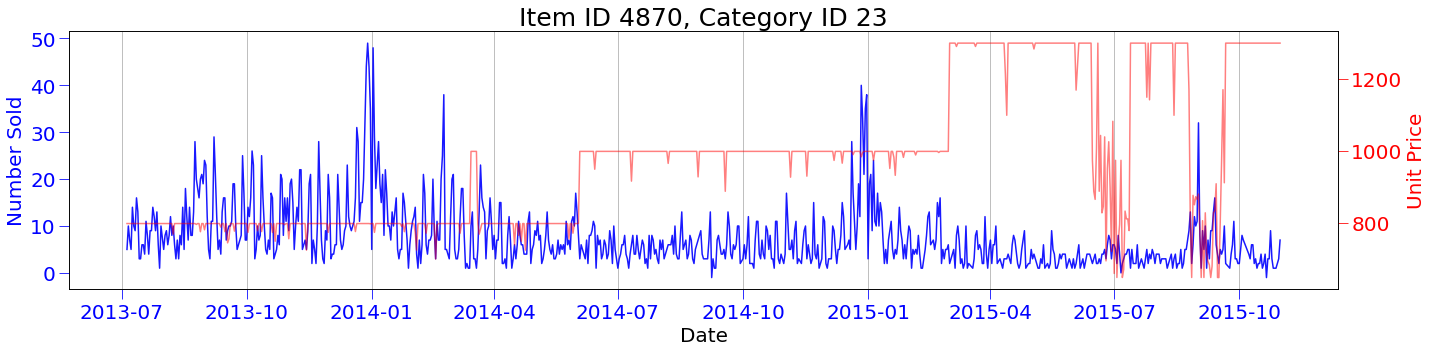

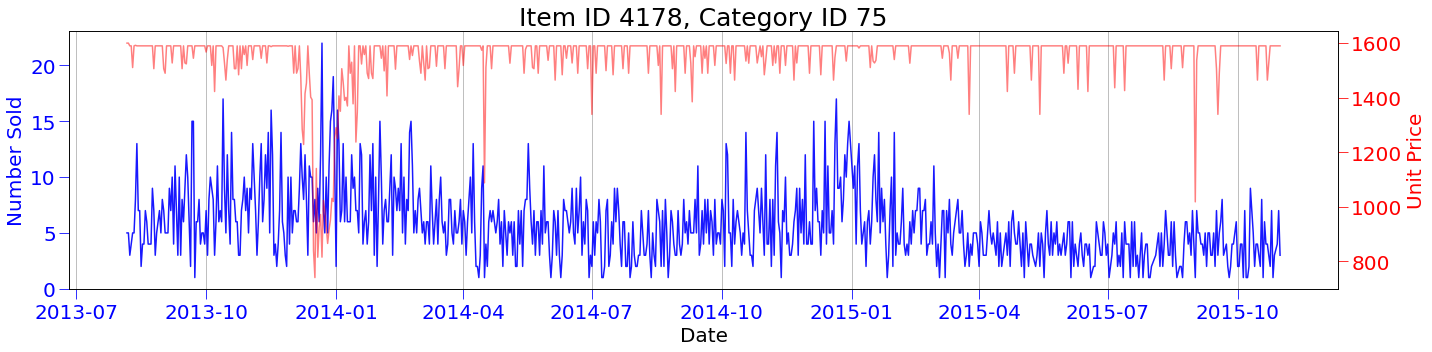

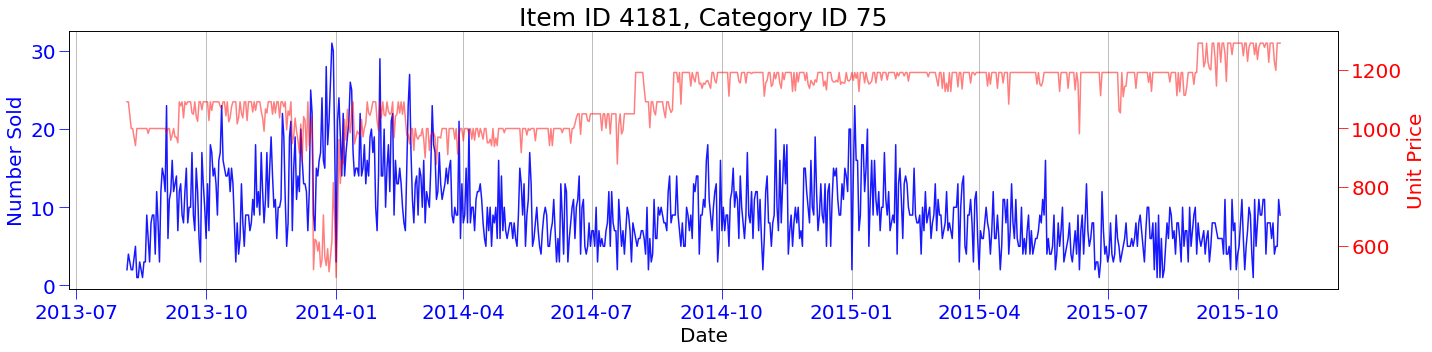

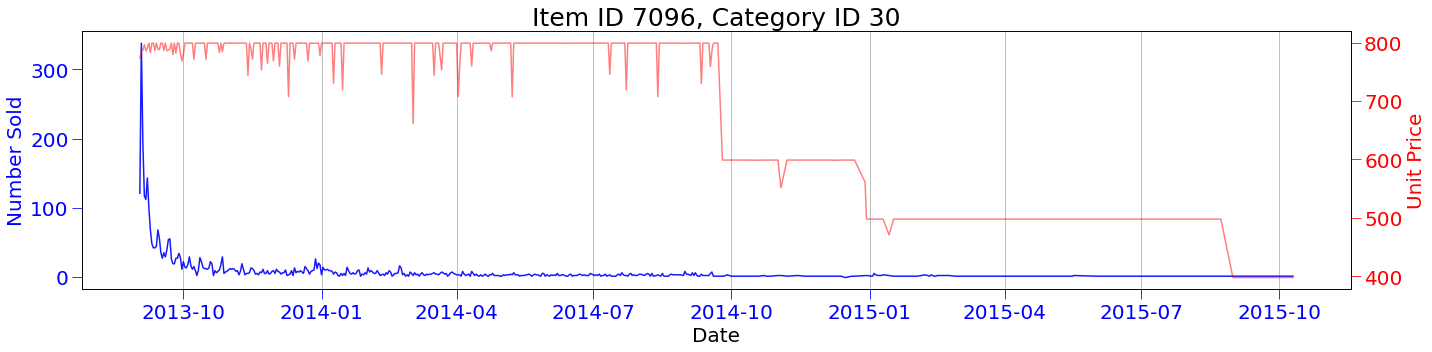

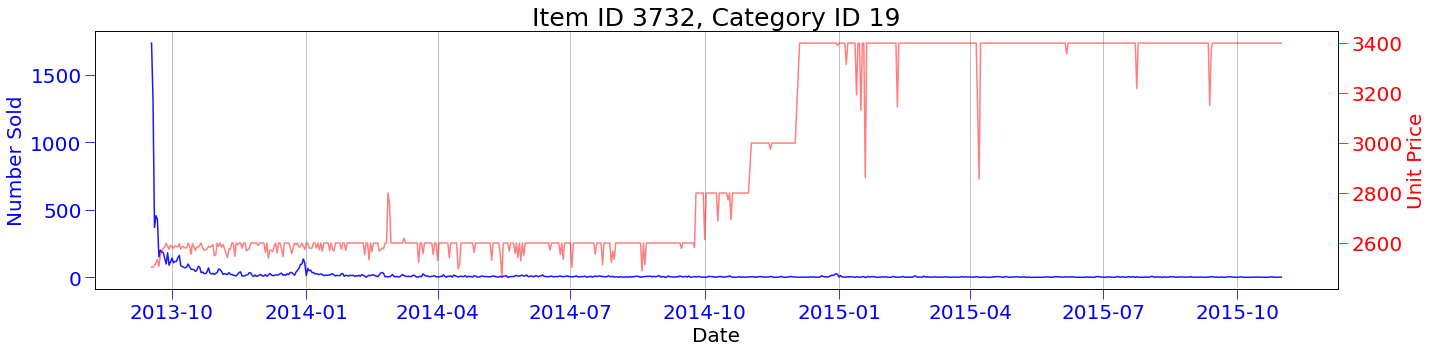

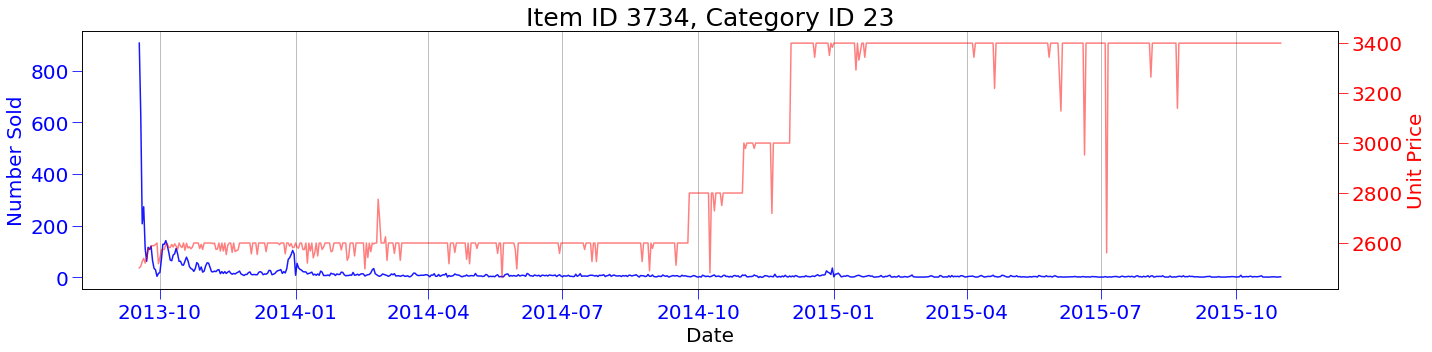

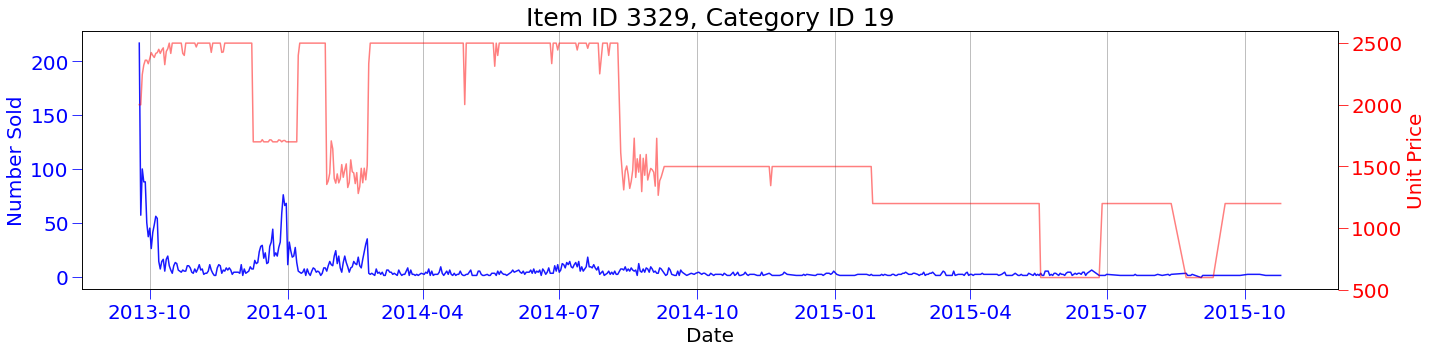

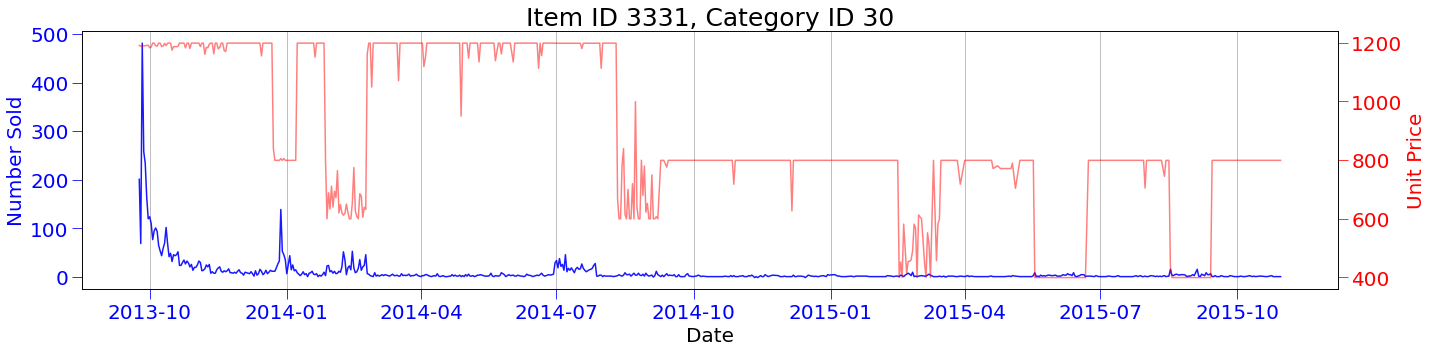

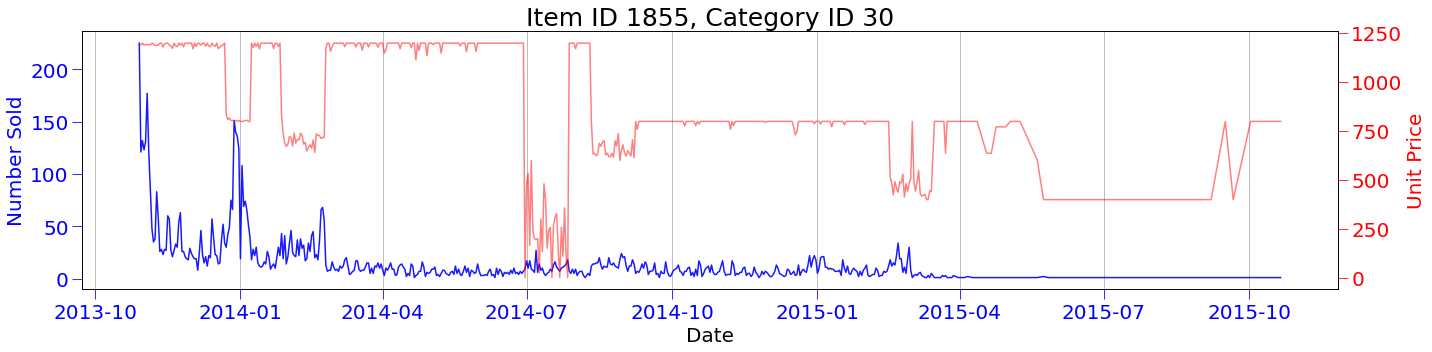

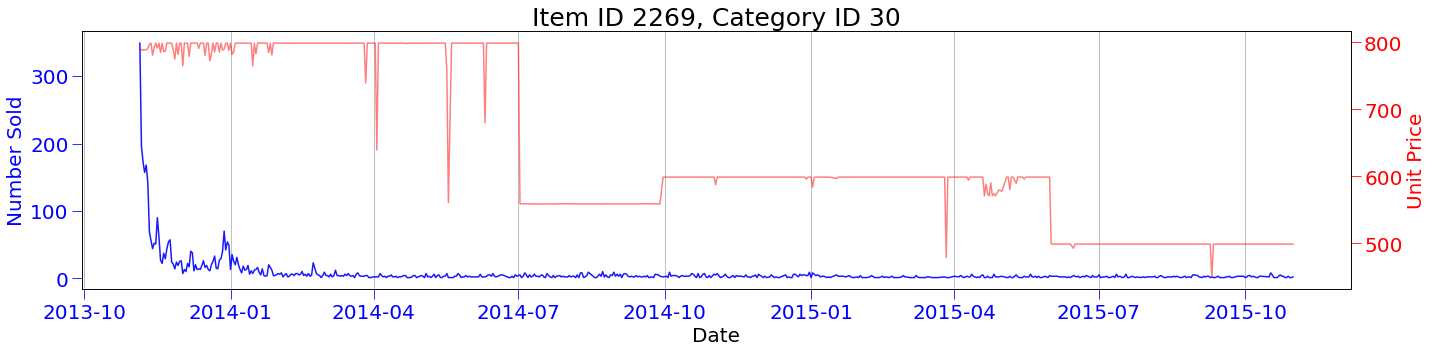

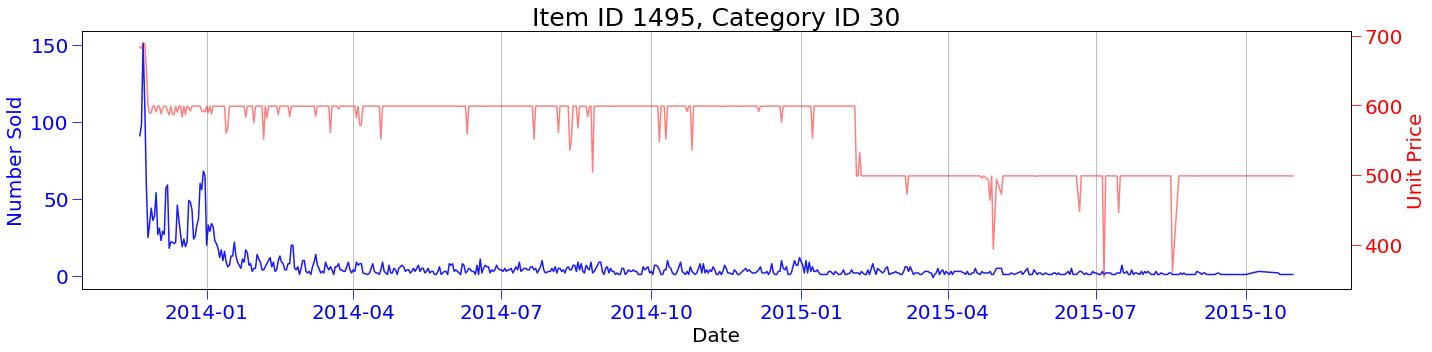

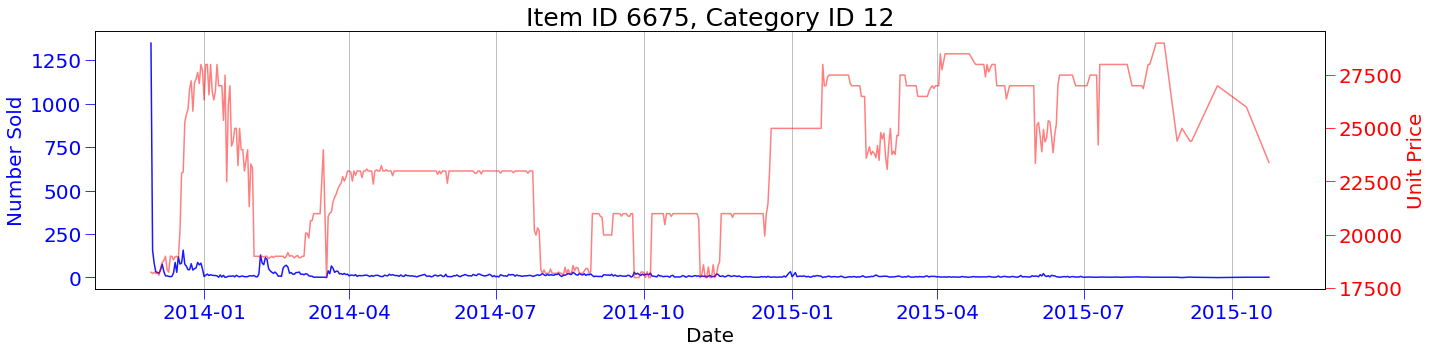

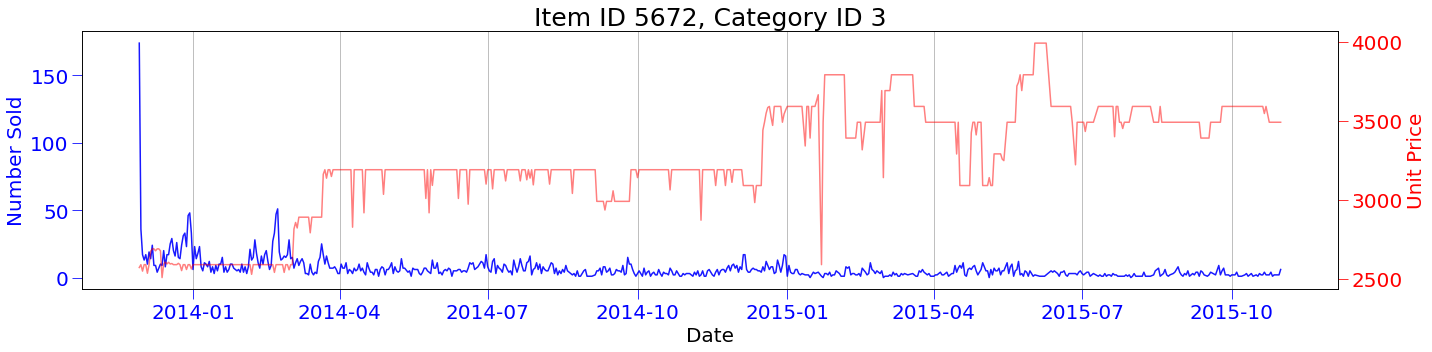

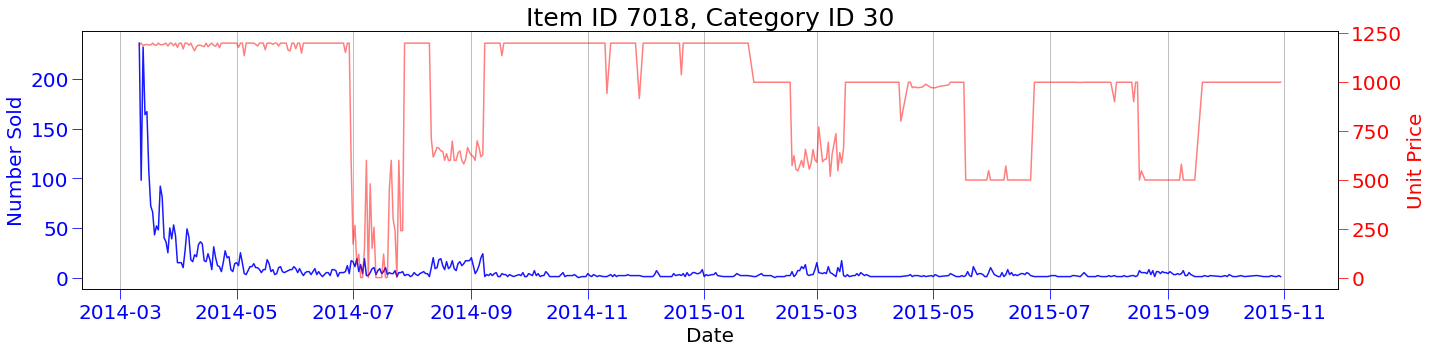

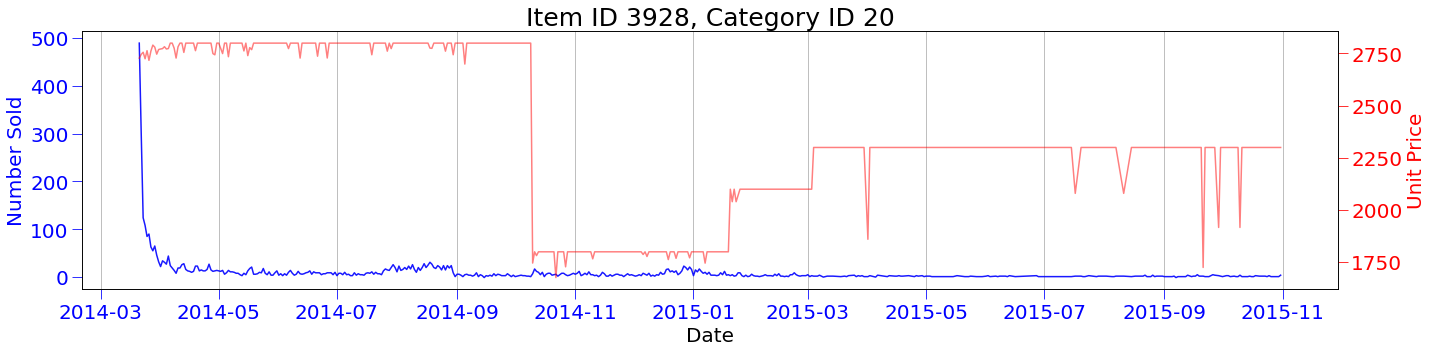

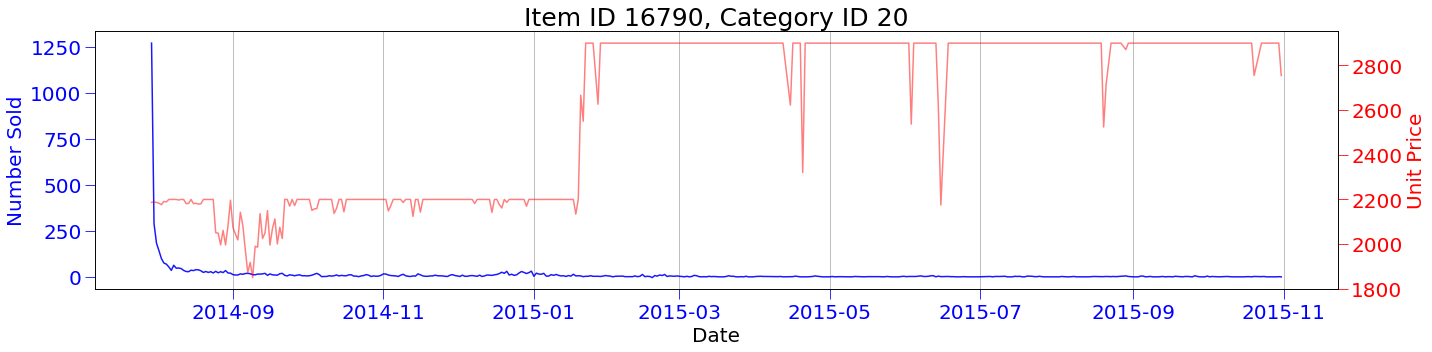

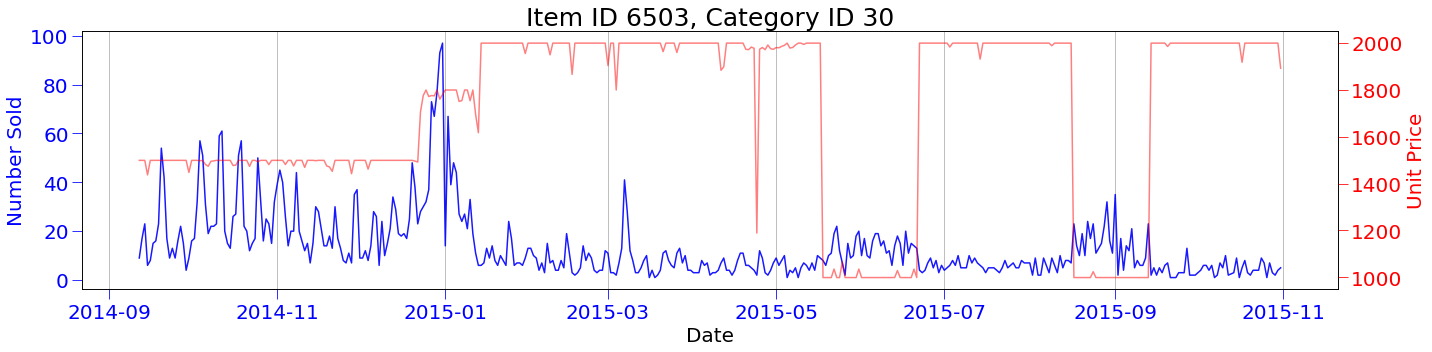

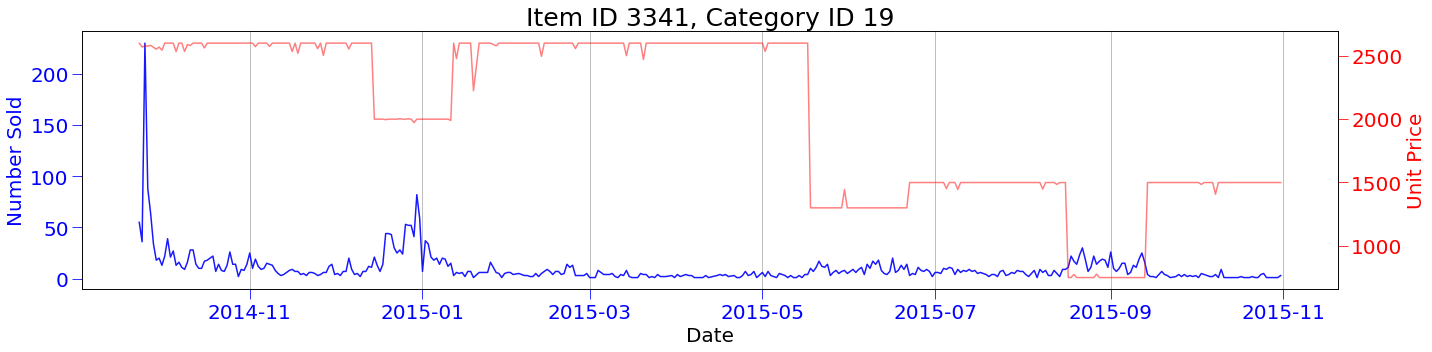

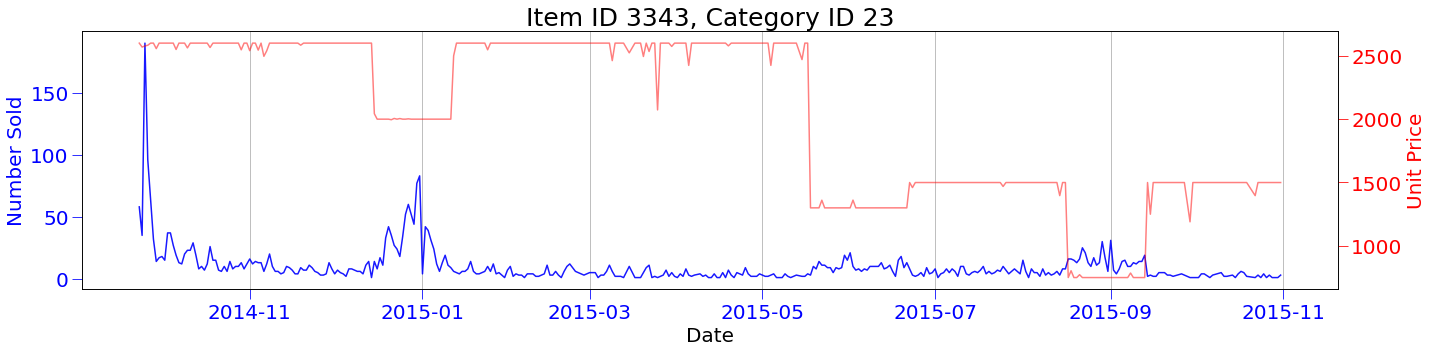

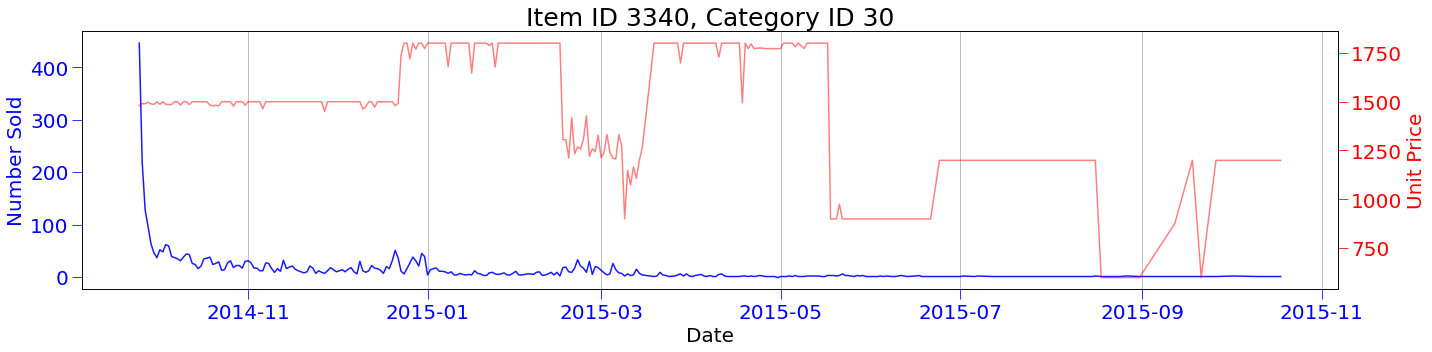

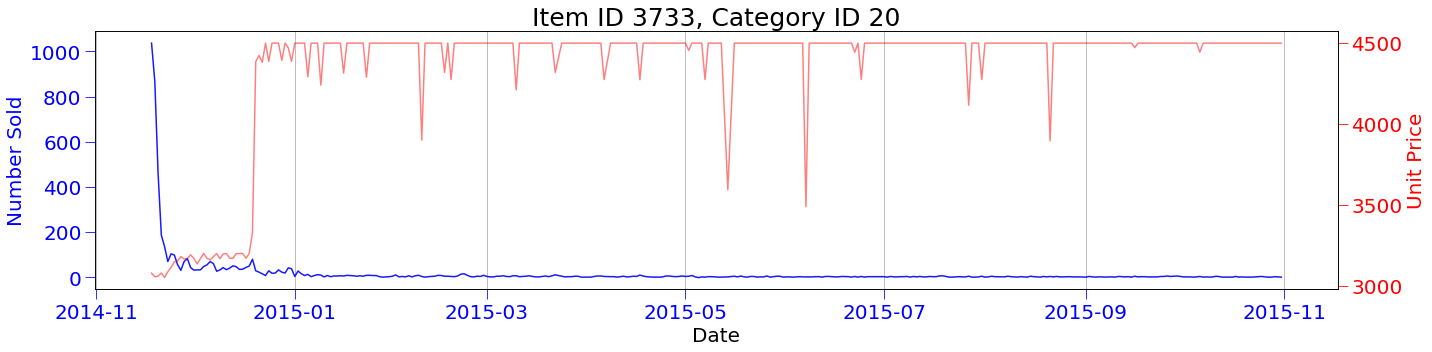

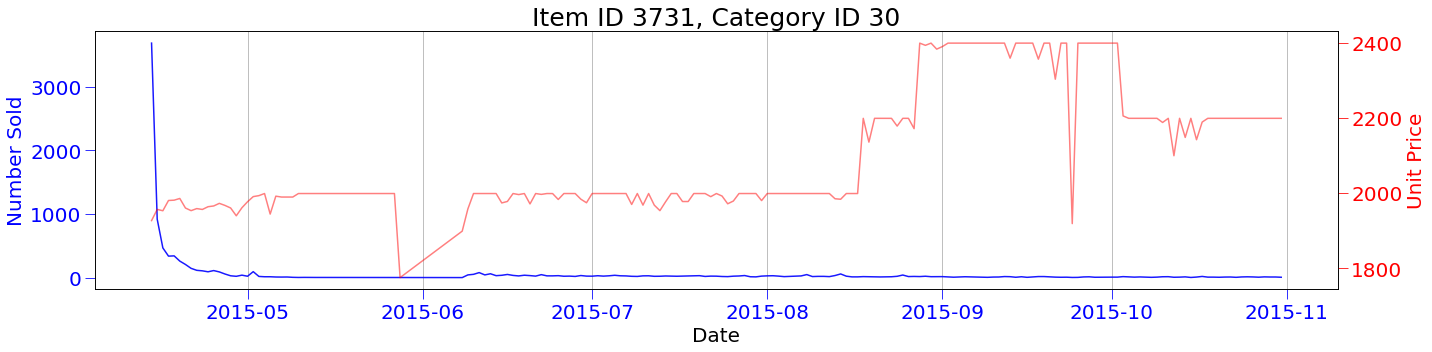

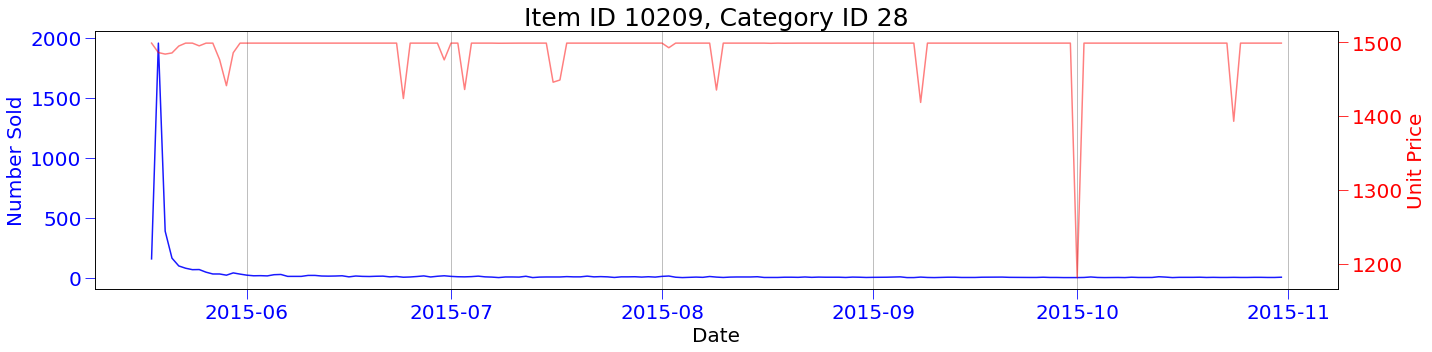

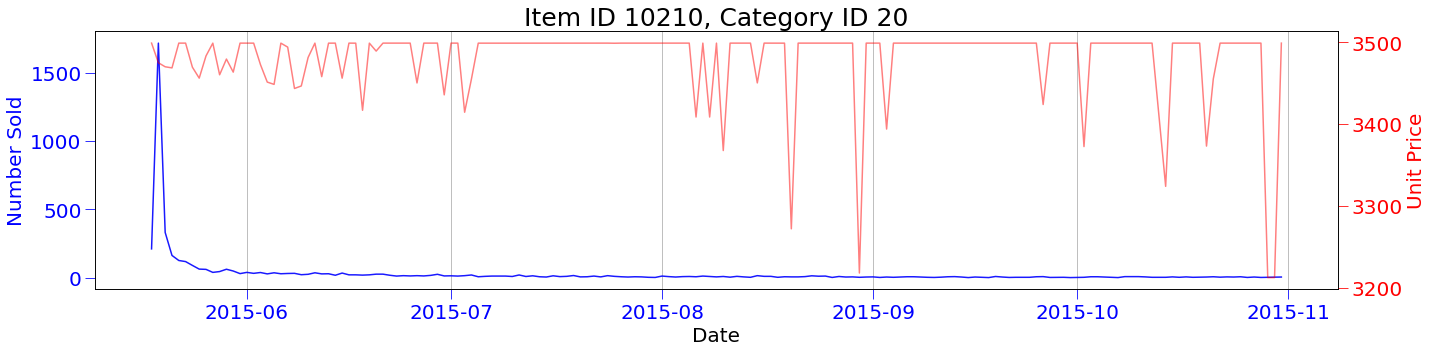

In [114]:
Price_graph(DataFrameDict.keys())

From the charts of price changes we can see that pricing can be separated into 3 groups:

### The price of item increases over time.

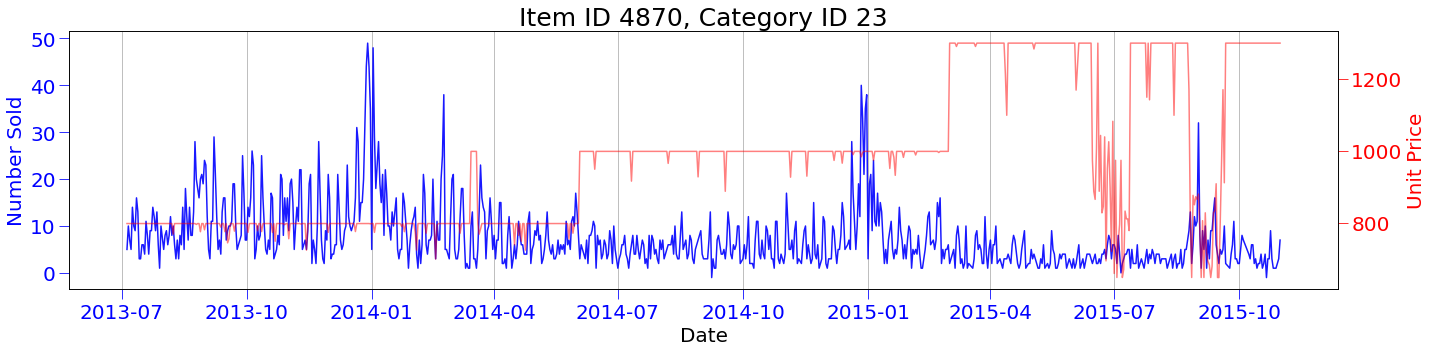

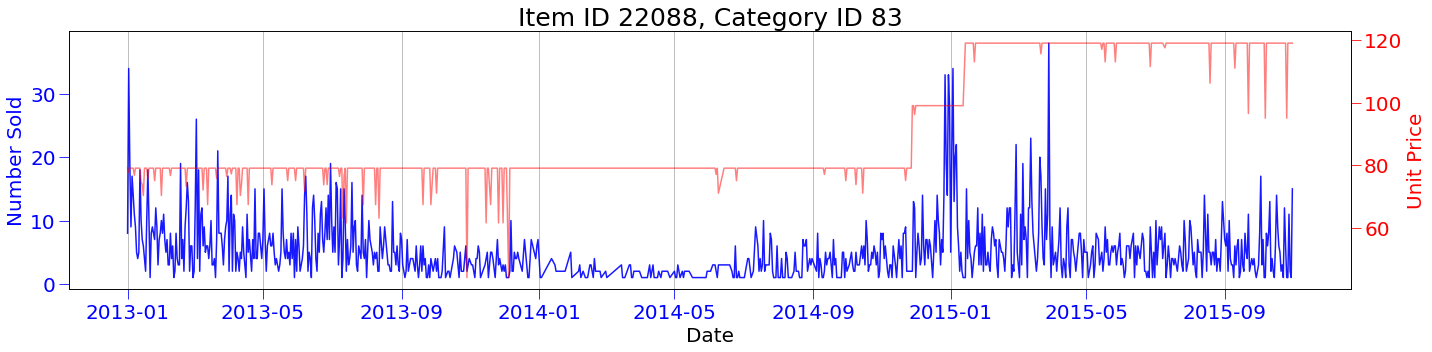

In [115]:
Price_graph((4870, 22088))

### The price of item decreases over time.

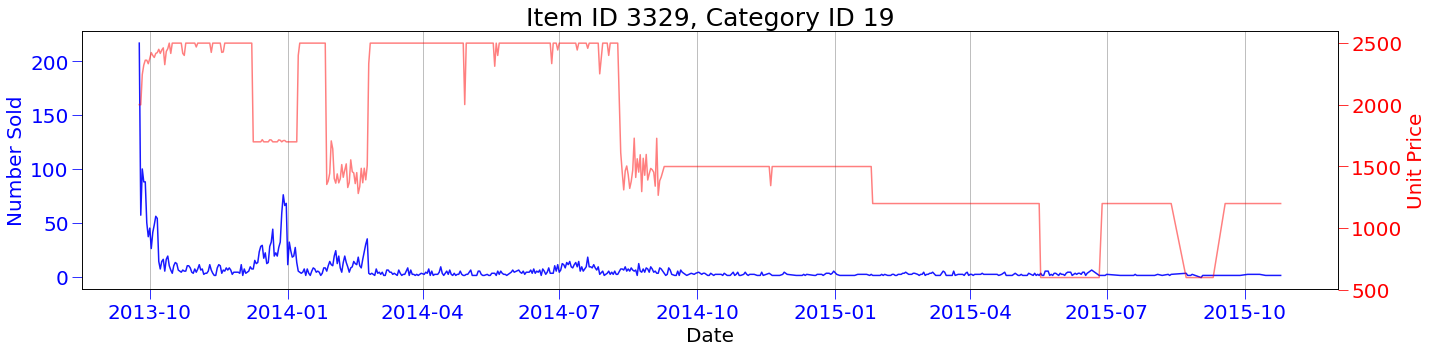

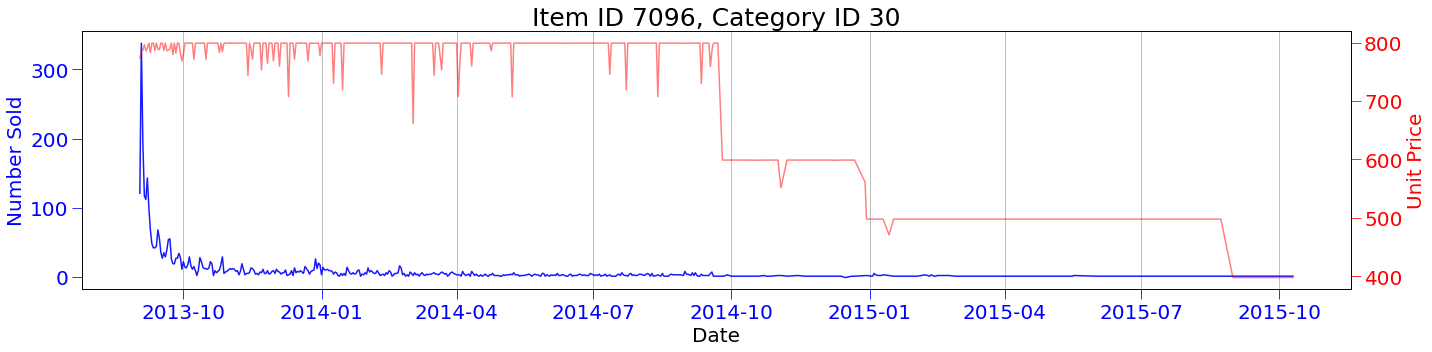

In [116]:
Price_graph((3329, 7096))

### Or price of item is not fixed.

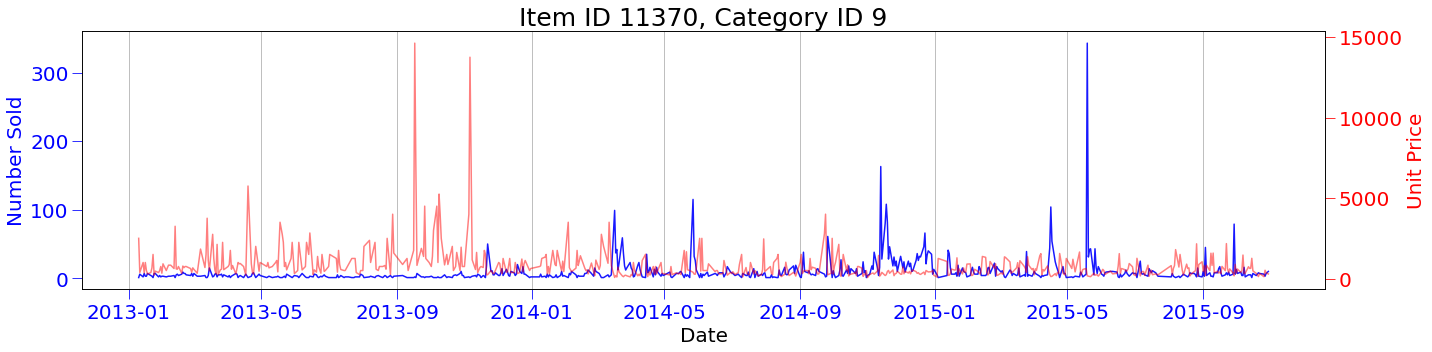

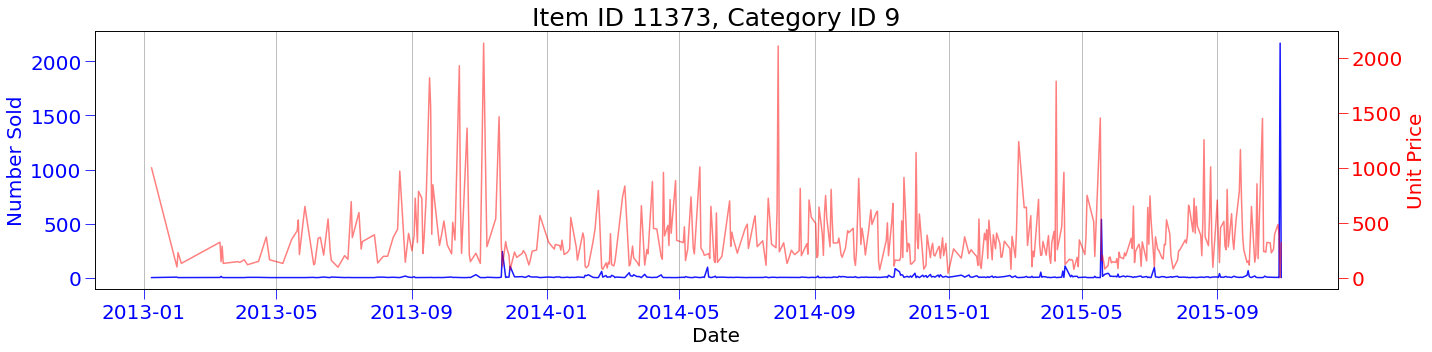

In [117]:
Price_graph((11370, 11373))

We can investigate further on the items with non-fixed item prices by looking at their item name to see what they actually are.

In [63]:
print(df_name.loc[df_name.item_id == [11370]].item_name)
print(df_name.loc[df_name.item_id == [11373]].item_name)

11370    Доставка (по Москве)
Name: item_name, dtype: object
11373    Доставка до пункта выдачи (Boxberry)
Name: item_name, dtype: object


By using Google Translate, we can see the product names in English are "Delivery (Moscow)" and "Delivery to the point of delivery (Boxberry)". It makes sense that delivery fees are not fixed fees but flexible pricing according to distance. Therefore, discount on delivery fee can be difficult to measure so we can ignore them.  

Items that are most responsive to discounts are the ones with pricing at decreases over time instead ones that increase over time. This is reasonable because products with increasing pricing usually have inelastic demand compared to items with decreasing pricing. And if demand is inelastic, sales would not change drastically when discount or price hike occurs. On the other hand, products with elastic demand would show larger increase or decrease in sales when responding to price changes. 

### Promotion

There are a few items that have overlapping discount periods:

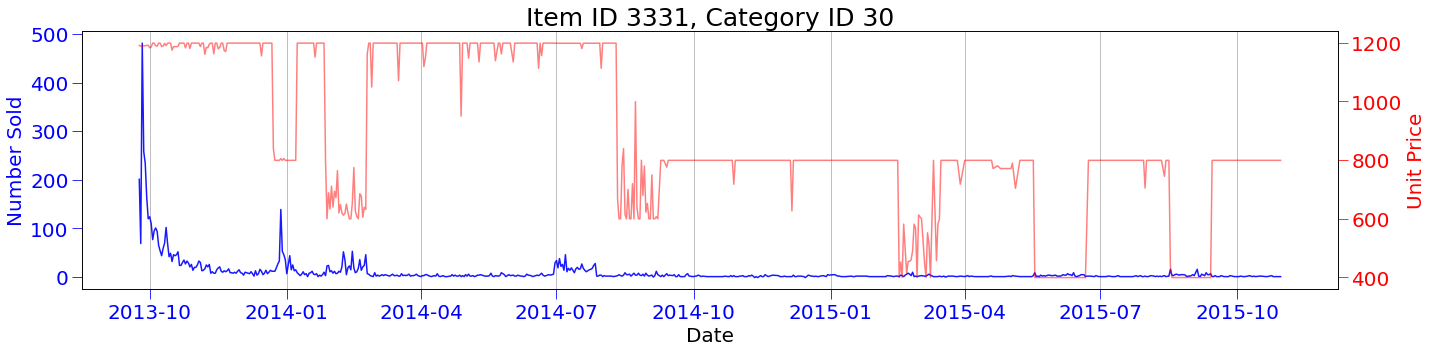

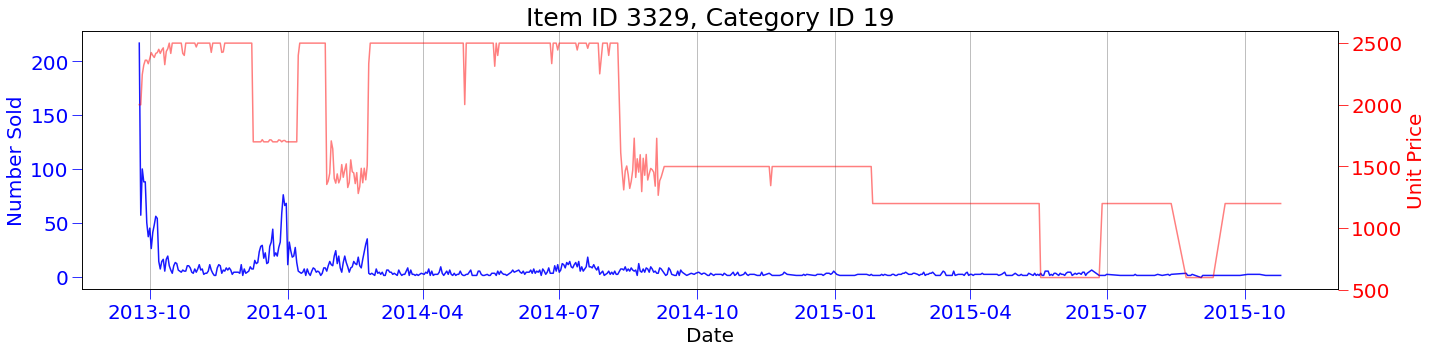

In [118]:
Price_graph((3331, 3329))

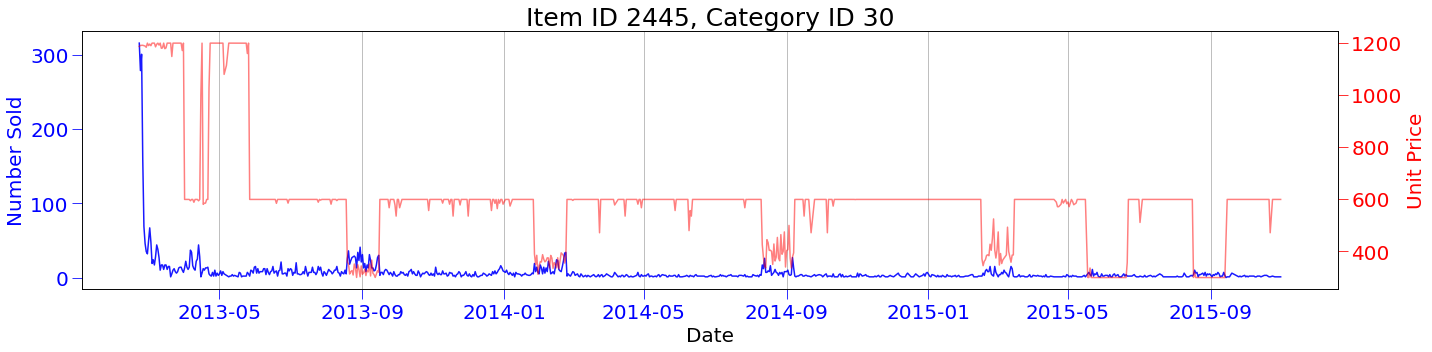

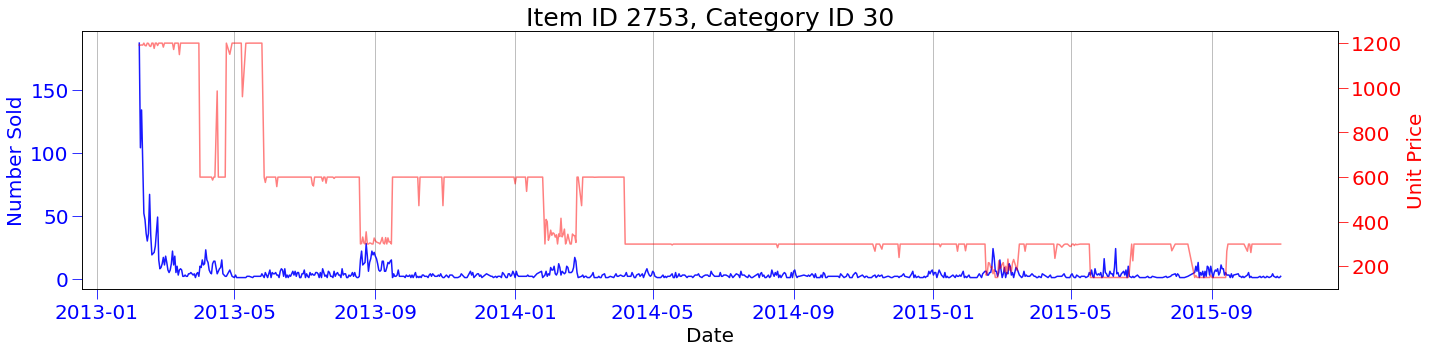

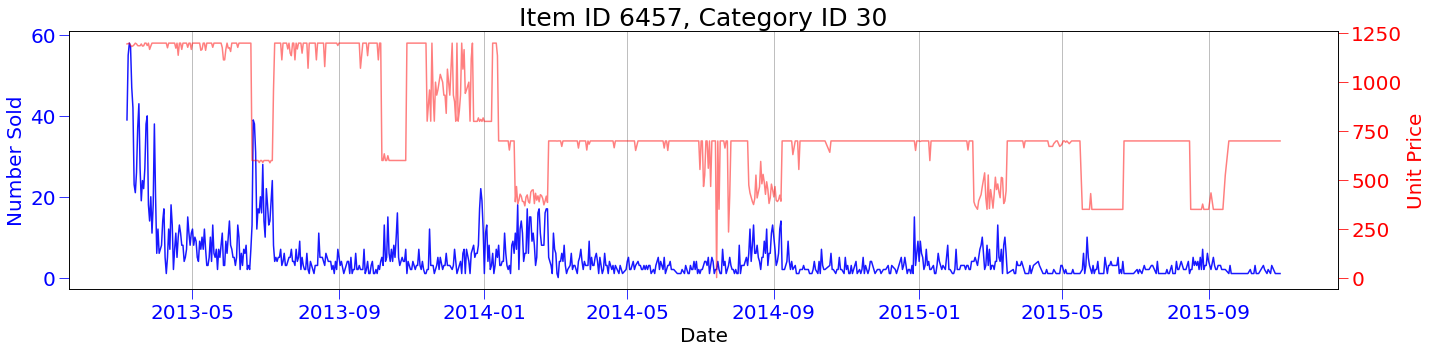

In [119]:
Price_graph((2445, 2753, 6457))

Items that share same discount periods are mostly from the same category, which is 30 as we can see from above. 

Since time-series sales data are not iid, it is difficult to calculate correlation between price discount and increase in sales besides visualizing the changes. However, we can see its effect on some products which can be useful for engineering additional features for regressors. We can add mean price and price difference for feature engineering.